<a href="https://colab.research.google.com/github/candelapalomeque/Analisis_Predictivo/blob/main/Trabajo_Practico_2_AP_Ultimo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
#Descargo paquetes a usar
install.packages("corrplot")

install.packages("Hmisc")

install.packages("dplyr")

install.packages("rpart")

install.packages("rpart.plot")

install.packages("caret")

install.packages("e1017")

install.packages("ggplot2")

install.packages("readxl")

install.packages("viridis") 

install.packages("tidyverse")

install.packages("fmsb") 

install.packages("fastDummies")

install.packages("funModeling")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘e1017’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

I

In [6]:
#Instalo librerías a usar
library("caret")

library("data.table")

library("class")

library("e1071")

library("dplyr")

library("ggplot2")

library("readxl")

library("tidyverse")

library("viridis")

library("fmsb")

library("rpart")


Loading required package: ggplot2

Loading required package: lattice

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”

Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ purrr   0.3.4
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::lift()      masks caret::lift()
✖

DESCARGO BASES DE DATOS

In [7]:
#Descargo la base de datos "datos"
datos <- read.csv("datos.csv" ,header=TRUE,sep=',')

In [8]:
#Descargo la base de datos "resultados"
resultados <- read.csv("resultados.csv" ,header=TRUE,sep=',')

LIMPIO BASE DE DATOS "DATOS"

In [9]:
table(datos$seasonNumber)
datos$seasonNumber[datos$seasonNumber == ""] <- "\\N"
datos$seasonNumber=as.numeric(datos$seasonNumber)
datos$seasonNumber[is.na(datos$seasonNumber)]=median(datos$seasonNumber,na.rm=TRUE)


          \\N      1     10     11     12     13    135     14     15     16 
496325  11119 165288   4717   3977   3239   3011      1   2667   2269   1893 
    17     18     19   1965   1966   1967   1994   1995   1996      2     20 
  1728   1578   1440      1      1      1      1      1      3  63565   1227 
  2012     21     22     23     24     25     26     27     28     29      3 
     1   1008    972    986    859    658    583    495    484    425  39808 
    30     31     32     33     34     35     36     37     38     39      4 
   361    306    277    279    218    283    290    278    168    154  27059 
    40     41     42     43     44     45     46     47     48     49      5 
   162    126    148    139    150    141    106     68     75     57  19367 
    50     51     52     53     54     55     56     57     58     59      6 
    66     49     59     53     42     16     27     28     42     28  13786 
    60     61     62     63     64     65     66     67     68 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [10]:
table(datos$titleType)
datos$titleType <- factor(datos$titleType)
datos$tvEpisode <- ifelse(datos$titleType=='tvEpisode',1,0)
datos$movie <- ifelse(datos$titleType=='movie',1,0)
datos$video <- ifelse(datos$titleType=='video',1,0)
datos$tvMovie <- ifelse(datos$titleType=="tvMovie",1,0)
datos$short <- ifelse(datos$titleType=='short',1,0)
datos$tvSeries <- ifelse(datos$titleType=='tvSeries',1,0)
datos$videoGame <- ifelse(datos$titleType=="videoGames",1,0)
datos$tvMiniSeries <- ifelse(datos$titleType=="tvMiniSeries",1,0)
datos$tvSpecial <- ifelse(datos$titleType=="tvSpecial",1,0)
datos$tvShort <- ifelse(datos$titleType =="tvShort",1,0)
str(datos$titleType)


                    movie        short    tvEpisode tvMiniSeries      tvMovie 
           2       217350       102830       403690         9091        36964 
    tvSeries      tvShort    tvSpecial        video    videoGame 
       59710         1727         8124        50568         9944 

 Factor w/ 11 levels "","movie","short",..: 4 4 10 3 4 4 4 2 3 10 ...


In [11]:
table(datos$isAdult)
datos$isAdult[datos$isAdult == "2020"] <- "0"
datos$isAdult[is.na(datos$isAdult)]<-"0"
datos$isAdult <- factor(datos$isAdult)
str(datos$isAdult)


     0      1   2020 
883096  16901      1 

 Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...


In [12]:
table(datos$startYear)
datos$startYear[datos$startYear == ""] <- NA
datos$startYear[datos$startYear == "\\N"] <- NA
datos$startYear<-as.numeric(datos$startYear)
datos$startYear[is.na(datos$startYear)]=median(datos$startYear,na.rm=TRUE)
str(datos$startYear)


        \\N  1874  1878  1881  1885  1887  1888  1889  1890  1891  1892  1893 
    2   145     1     2     1     1    29     3     2     5     6     9     4 
 1894  1895  1896  1897  1898  1899  1900  1901  1902  1903  1904  1905  1906 
  108   124   612   691   402   294   323   239   180   275   242   201   201 
 1907  1908  1909  1910  1911  1912  1913  1914  1915  1916  1917  1918  1919 
  195   285   317   300   294   471   353   378   433   410   369   321   354 
 1920  1921  1922  1923  1924  1925  1926  1927  1928  1929  1930  1931  1932 
  446   367   364   398   420   514   601   641   676   737   865  1007  1151 
 1933  1934  1935  1936  1937  1938  1939  1940  1941  1942  1943  1944  1945 
 1160  1254  1257  1324  1303  1261  1239  1252  1223  1267  1188  1045   927 
 1946  1947  1948  1949  1950  1951  1952  1953  1954  1955  1956  1957  1958 
  985  1030  1136  1248  1451  1577  1784  2051  2033  2396  2445  2770  2945 
 1959  1960  1961  1962  1963  1964  1965  1966  19

 num [1:900000] 2014 2020 2006 2016 2014 ...


In [13]:
datos$endYear[datos$endYear == "\\N"] <- NA
datos$endYear[datos$endYear == " "] <- NA
datos$endYear<-as.numeric(datos$endYear)
datos$endYear <- ifelse(is.na(datos$endYear),2021,datos$endYear)

In [14]:
table(datos$episodeNumber)
datos$episodeNumber[datos$episodeNumber == ""] <- "\\N"
datos$episodeNumber<-as.numeric(datos$episodeNumber)
datos$episodeNumber[is.na(datos$episodeNumber)]= median(datos$episodeNumber,na.rm=TRUE)


          \\N      0      1     10    100   1000  10000  10001   1001   1002 
496325  11119    837  32183  15465    166      5      1      1      2      3 
  1003  10039   1004  10043   1005  10056   1006  10061  10062  10067   1007 
     1      1      1      1      2      1      2      1      1      1      3 
 10071   1008   1009    101   1010   1011   1012   1013   1014   1015  10152 
     1      2      2    158      2      3      3      3      1      2      1 
  1016  10164   1017  10172   1018  10189   1019  10191  10194  10197  10198 
     3      1      2      1      3      1      3      1      1      1      1 
   102   1020  10201   1021   1022   1023  10233   1024   1025  10253   1026 
   157      3      1      2      2      2      1      3      4      1      3 
  1027  10271  10272   1028   1029    103   1030   1031   1032   1033   1034 
     3      1      1      2      3    159      3      3      5      2      3 
  1035   1036  10364   1037   1038  10386   1039    104   1040 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [15]:
table(datos$runtimeMinutes)
datos$runtimeMinutes[datos$runtimeMinutes == ""] <- "\\N"
datos$runtimeMinutes=as.numeric(datos$runtimeMinutes)
datos$runtimeMinutes[is.na(datos$runtimeMinutes)]=median(datos$runtimeMinutes,na.rm=TRUE)
str(datos$runtimeMinutes)


                \\N         0         1        10       100      1000     10062 
        2    237950         6      2916      8563      7901         1         1 
      101       102      1020       103      1035       104      1040       105 
     2631      3055         3      2587         1      2776         3      4333 
      106       107       108      1080      1084       109      1099        11 
     2151      2050      2104         2         1      1579         1      7395 
      110      1100       111       112      1120       113       114       115 
     3479         3      1337      1527         1      1352      1142      1871 
      116       117      1170       118       119      1196        12       120 
     1102      1102         1      1230       939         1      5947      5931 
     1200       121      1210       122       123      1234       124       125 
        2       685         1       873       674         2       760      1016 
     1256       126      12

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


 num [1:900000] 21 46 7 46 22 50 22 46 15 4 ...


In [16]:
table(datos$runtime)
datos$runtime[datos$runtime == ""] <- "\\N"
datos$runtime=as.numeric(datos$runtime)
datos$runtime[is.na(datos$runtime)]=median(datos$runtime,na.rm=TRUE)
str(datos$runtime)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
1257  112   30   34   47   42   61   94   73   63   48   35   50   39   26   35 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  23   26   24   16   38   22   30   15   21   48   26   15   14   25   49    6 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
  14   17   17   19    9    3    7   18   39   12   23   21   18   56   34   17 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
  39   23   61   19   42   45   38   62   37   47   75   65  215   83   96   89 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
 100  125  111   99  121  108  199  161  236  190  227  395  244  272  327  306 
  80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95 
 673  431  607  641  707 1037  854  886 1000  979 2370 1090 1058 1215 1043 1353 
  96   97   98   99  100  1

 num [1:900000] 95 95 95 95 95 95 95 95 95 95 ...


In [17]:
table(datos$revenue)
datos$revenue[datos$revenue == ""] <- "\\N"
datos$revenue=as.numeric(datos$revenue)
datos$revenue[is.na(datos$revenue)]=median(datos$revenue,na.rm=TRUE)
str(datos$revenue)


         0          1          2          3          4          5          6 
     35201         13          1          5          2          4          2 
         7          8          9         10         11         12         13 
         6          5          1          2          1          3          1 
        14         15         16         18         20         24         25 
         1          6          2          3          2          1          3 
        28         29         30         32         38         41         43 
         1          1          3          1          2          1          1 
        46         47         50         51         57         60         70 
         1          1          1          2          2          1          1 
        76         79         80         83         85         88         92 
         1          1          1          1          1          1          1 
        97        100        103        105        110        1

 num [1:900000] 0 0 0 0 0 0 0 0 0 0 ...


In [18]:
table(datos$popularity)
datos$popularity[datos$popularity == ""] <- "\\N"
datos$popularity=as.numeric(datos$popularity)
datos$popularity[is.na(datos$popularity)]=median(datos$popularity,na.rm=TRUE)
str(datos$popularity)


         0      1e-06      2e-06      3e-06      4e-06      5e-06      6e-06 
        54         48          3          5          6          2          4 
     8e-06      1e-05    1.1e-05    1.3e-05    1.5e-05    1.7e-05    1.8e-05 
         4          1          5          1          2          2          2 
   2.1e-05    2.2e-05    2.4e-05    2.5e-05    2.6e-05    3.1e-05    3.2e-05 
         2          1          1          3          1          1          1 
   3.3e-05    3.5e-05    3.6e-05    3.8e-05    3.9e-05      4e-05    4.1e-05 
         1          2          1          2          1          2          1 
   4.2e-05    4.3e-05    4.4e-05    4.8e-05    4.9e-05      5e-05    5.3e-05 
         1          1          1          3          1          2          1 
   5.7e-05    5.9e-05    6.2e-05    7.4e-05      8e-05    8.2e-05    8.8e-05 
         1          1          1          2          1          2          1 
   9.4e-05    9.5e-05   0.000102   0.000104   0.000112   0.0001

 num [1:900000] 1.28 1.28 1.28 1.28 1.28 ...


In [19]:
table(datos$budget)
datos$budget[datos$budget == ""] <- "\\N"
datos$budget=as.numeric(datos$budget)
datos$budget[is.na(datos$budget)]=median(datos$budget,na.rm=TRUE)
str(datos$budget)


        0         1         2         3         4         5         6         7 
    33609        22        14         8         6         7         5         2 
        8         9        10        11        12        15        17        18 
        5         1        10         1         4         1         1         1 
       20        25        28        30        32        33        37        42 
        2         1         1         4         1         1         1         2 
       50        60        68        70        75        85        86        88 
        3         1         1         1         1         1         1         1 
       89        90        94        95        97        98       100       107 
        1         2         2         1         2         2         3         1 
      108       110       112       113       114       115       117       120 
        1         4         2         2         2         2         1         2 
      121       130       1

 num [1:900000] 0 0 0 0 0 0 0 0 0 0 ...


In [20]:
table(datos$ordering)
datos$ordering[datos$ordering == ""] <- "\\N"
datos$ordering=as.numeric(datos$ordering)
datos$ordering[is.na(datos$ordering)]=median(datos$ordering,na.rm=TRUE)
str(datos$ordering)


     1      2      3      4      5      6      7      8      9     10     11 
127723 109150  29232  15584  10464   7733   6058   4777   3958   3283   2669 
    12     13     14     15     16     17     18     19     20     21     22 
  2432   2073   1786   1599   1338   1234   1097    904    823    718    654 
    23     24     25     26     27     28     29     30     31     32     33 
   591    588    539    439    404    338    313    297    285    254    233 
    34     35     36     37     38     39     40     41     42     43     44 
   195    171    155    141    138    130     89    101     79     68     67 
    45     46     47     48     49     50     51     52     53     54     55 
    49     44     34     34     27     22     30     22     12     10     12 
    56     57     58     59     60     61     62     63     64     65     66 
    15      8      9      6      8      6      5      3      5      1      3 
    67     68     71     72     73     75     77     78     82 

 num [1:900000] 2 2 1 2 2 2 2 2 2 1 ...


In [21]:
datos$isOriginalTitle <- ifelse(is.na(datos$isOriginalTitle),2021,datos$isOriginalTitle)

In [22]:
#Trabajo los missings
mean(is.na(datos$averageRating))
mean(is.na(datos$numVotes))
mean(is.na(datos$titleType))
mean(is.na(datos$isAdult))
mean(is.na(datos$startYear))
mean(is.na(datos$endYear))
mean(is.na(datos$runtimeMinutes))
mean(is.na(datos$genres_x))
mean(is.na(datos$directors))
mean(is.na(datos$writers))
mean(is.na(datos$seasonNumber))
mean(is.na(datos$episodeNumber))
mean(is.na(datos$ordering))
mean(is.na(datos$language))
mean(is.na(datos$types))
mean(is.na(datos$attributes))
mean(is.na(datos$isOriginalTitle))
mean(is.na(datos$adult))
mean(is.na(datos$budget))
mean(is.na(datos$genres_y))
mean(is.na(datos$original_language))
mean(is.na(datos$overview))
mean(is.na(datos$popularity))
mean(is.na(datos$production_companies))
mean(is.na(datos$production_countries))
mean(is.na(datos$release_date))
mean(is.na(datos$revenue))
mean(is.na(datos$runtime))
mean(is.na(datos$status))
mean(is.na(datos$tagline))
mean(is.na(datos$video))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [23]:
#Cuento cantidad de missings 
colSums(is.na(datos))

averageRating             numVotes            titleType 
                   0                    0                    0 
             isAdult            startYear              endYear 
                   0                    0                    0 
      runtimeMinutes             genres_x            directors 
                   0                    0                    0 
             writers         seasonNumber        episodeNumber 
                   0                    0                    0 
            ordering             language                types 
                   0                    0                    0 
          attributes      isOriginalTitle                adult 
                   0                    0                    0 
              budget             genres_y    original_language 
                   0                    0                    0 
            overview           popularity production_companies 
                   0                    0                    0 
production_countries         release_date              revenue 
                   0                    0                    0 
             runtime               status              tagline 
                   0                    0                    0 
               video                   id            tvEpisode 
                   0                    0                    0 
               movie              tvMovie                short 
                   0                    0                    0 
            tvSeries            videoGame         tvMiniSeries 
                   0                    0                    0 
           tvSpecial              tvShort 
                   0                    0

In [24]:
#divido title Type en buenos y malos 
datos %>%
    group_by(titleType) %>%
    summarise(cantidad=n(),avg_score=mean(averageRating)) %>%
    filter(cantidad>10) %>% 
    arrange(desc(avg_score))

tty_buenos <- datos %>% group_by(titleType) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score>6)

tty_malos <- datos %>% group_by(titleType) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score<=3)

nrow(tty_buenos)
nrow(tty_malos)

titleType,cantidad,avg_score
<fct>,<int>,<dbl>
tvEpisode,403690,7.392150
tvMiniSeries,9091,7.088109
videoGame,9944,7.019660
tvShort,1727,6.855646
tvSeries,59710,6.802765
short,102830,6.781752
tvSpecial,8124,6.759183
tvMovie,36964,6.611189
video,50568,6.568889


[1] 10

[1] 0

In [25]:
#divido escritores en buenos y malos 
datos %>%
    group_by(writers) %>%
    summarise(cantidad=n(),avg_score=mean(averageRating)) %>%
    filter(cantidad>10) %>% 
    arrange(desc(avg_score))

wr_buenos <- datos %>% group_by(writers) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score>6)

wr_malos <- datos %>% group_by(writers) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score<=3)

nrow(wr_buenos)
nrow(wr_malos)

writers,cantidad,avg_score
<chr>,<int>,<dbl>
"nm5870567,nm9884248,nm4492923",12,10.000000
nm1059277,25,9.988000
"nm10625960,nm11487824,nm4492923",26,9.961538
nm4530933,12,9.941667
"nm10640878,nm10297145",64,9.921875
"nm4246495,nm4250085,nm7453536",11,9.918182
"nm3253005,nm1046369",11,9.881818
nm9909651,20,9.860000
nm1974030,315,9.828254


[1] 15174

[1] 165

In [26]:
#divido directores en buenos y malos 
datos %>%
    group_by(directors) %>%
    summarise(cantidad=n(),avg_score=mean(averageRating)) %>%
    filter(cantidad>10) %>% 
    arrange(desc(avg_score))

dr_buenos <- datos %>% group_by(directors) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score>6)

dr_malos <- datos %>% group_by(directors) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score<=3)

nrow(dr_buenos)
nrow(dr_malos)

directors,cantidad,avg_score
<chr>,<int>,<dbl>
nm6318137,36,9.975000
nm7477059,11,9.918182
"nm9343671,nm2375975",28,9.875000
"nm10297145,nm10640878",27,9.862963
"nm10640878,nm10297145",31,9.851613
"nm5079383,nm3350480",14,9.850000
nm5368741,36,9.847222
nm1341249,20,9.825000
nm3795227,12,9.816667


[1] 10727

[1] 62

In [27]:
#divido generos x en buenos y malos 
datos %>%
    group_by(genres_x) %>%
    summarise(cantidad=n(),avg_score=mean(averageRating)) %>%
    filter(cantidad>10) %>% 
    arrange(desc(avg_score))

grx_buenos <- datos %>% group_by(genres_x) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score>6)

grx_malos <- datos %>% group_by(genres_x) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score<=3)

nrow(grx_buenos)
nrow(grx_malos)

genres_x,cantidad,avg_score
<chr>,<int>,<dbl>
"Music,Musical,Talk-Show",59,9.467797
"Adventure,Music,Mystery",11,9.400000
"Comedy,Game-Show,Musical",17,9.258824
"Animation,Crime,History",17,8.764706
"Comedy,Documentary,Talk-Show",20,8.675000
"History,Mystery,Thriller",35,8.665714
"Drama,Music,Mystery",76,8.660526
"Comedy,Horror,Reality-TV",105,8.609524
"Horror,Reality-TV,Sci-Fi",134,8.517164


[1] 786

[1] 0

In [28]:
#divido generos y en buenos y malos 
datos %>%
    group_by(genres_y) %>%
    summarise(cantidad=n(),avg_score=mean(averageRating)) %>%
    filter(cantidad>10) %>% 
    arrange(desc(avg_score))

gry_buenos <- datos %>% group_by(genres_y) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score>6)

gry_malos <- datos %>% group_by(genres_y) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score<=3)

nrow(gry_buenos)
nrow(gry_malos)

genres_y,cantidad,avg_score
<chr>,<int>,<dbl>
"[{'id': 16, 'name': 'Animation'}, {'id': 18, 'name': 'Drama'}]",24,7.512500
"[{'id': 10402, 'name': 'Music'}, {'id': 99, 'name': 'Documentary'}]",85,7.429412
"[{'id': 99, 'name': 'Documentary'}, {'id': 10402, 'name': 'Music'}]",166,7.360241
"[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]",16,7.356250
"[{'id': 10752, 'name': 'War'}, {'id': 99, 'name': 'Documentary'}]",19,7.315789
"[{'id': 878, 'name': 'Science Fiction'}, {'id': 16, 'name': 'Animation'}]",15,7.300000
"[{'id': 28, 'name': 'Action'}, {'id': 16, 'name': 'Animation'}, {'id': 878, 'name': 'Science Fiction'}]",20,7.285000
"[{'id': 99, 'name': 'Documentary'}, {'id': 36, 'name': 'History'}]",65,7.278462
"[{'id': 99, 'name': 'Documentary'}, {'id': 10752, 'name': 'War'}]",17,7.270588


[1] 1608

[1] 14

In [29]:
#divido production_companies buenos y malos 
datos %>%
    group_by(production_companies) %>%
    summarise(cantidad=n(),avg_score=mean(averageRating)) %>%
    filter(cantidad>10) %>% 
    arrange(desc(avg_score))

proco_buenos <- datos %>% group_by(production_companies) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score>6)

proco_malos <- datos %>% group_by(production_companies) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score<=3)

nrow(proco_buenos)
nrow(proco_malos)

production_companies,cantidad,avg_score
<chr>,<int>,<dbl>
"[{'name': 'Lucasfilm', 'id': 1}, {'name': 'Twentieth Century Fox Film Corporation', 'id': 306}]",21,8.538095
"[{'name': 'Soyuzmultfilm', 'id': 14599}]",24,7.795833
"[{'name': 'Walt Disney Pictures', 'id': 2}, {'name': 'Pixar Animation Studios', 'id': 3}]",29,7.648276
"[{'name': 'Pixar Animation Studios', 'id': 3}]",25,7.576000
"[{'name': 'Lenfilm', 'id': 10845}]",31,7.461290
"[{'name': 'Mosfilm', 'id': 5120}]",117,7.429060
"[{'name': 'Filmové Studio Barrandov', 'id': 1931}]",23,7.413043
"[{'name': 'BBC', 'id': 5996}]",24,7.412500
"[{'name': 'Columbia Pictures', 'id': 5}, {'name': 'IPC Films', 'id': 630}]",12,7.400000


[1] 6556

[1] 86

In [30]:
#divido production_countries buenos y malos 
datos %>%
    group_by(production_countries) %>%
    summarise(cantidad=n(),avg_score=mean(averageRating)) %>%
    filter(cantidad>10) %>% 
    arrange(desc(avg_score))

procount_buenos <- datos %>% group_by(production_countries) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score>6)

procount_malos <- datos %>% group_by(production_countries) %>%
    summarise(avg_score=mean(averageRating),cantidad=n(), puntos=sum(numVotes)) %>%
    arrange(desc(avg_score)) %>% 
    filter(puntos > 3500, avg_score<=3)

nrow(procount_buenos)
nrow(procount_malos)

production_countries,cantidad,avg_score
<chr>,<int>,<dbl>
"[{'iso_3166_1': 'RS', 'name': 'Serbia'}]",27,7.570370
"[{'iso_3166_1': 'NZ', 'name': 'New Zealand'}, {'iso_3166_1': 'US', 'name': 'United States of America'}]",19,7.415789
"[{'iso_3166_1': 'SU', 'name': 'Soviet Union'}]",11,7.354545
"[{'iso_3166_1': 'CZ', 'name': 'Czech Republic'}]",73,7.193151
"[{'iso_3166_1': 'IR', 'name': 'Iran'}]",49,7.138776
"[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'iso_3166_1': 'FR', 'name': 'France'}]",34,7.076471
"[{'iso_3166_1': 'RO', 'name': 'Romania'}]",40,7.065000
"[{'iso_3166_1': 'HU', 'name': 'Hungary'}]",67,7.029851
"[{'iso_3166_1': 'HR', 'name': 'Croatia'}]",14,6.992857


[1] 827

[1] 3

In [31]:
datos$directorbueno <- ifelse(datos$directors %in% dr_buenos$directors,1,0)
datos$directormalo <- ifelse(datos$directors %in% dr_malos$directors,1,0)
datos$writerbueno <- ifelse(datos$writers %in% wr_buenos$writers,1,0)
datos$writermalo <- ifelse(datos$writers %in% wr_malos$writers,1,0)
datos$titletypebueno <- ifelse(datos$titleType %in% tty_buenos$titleType,1,0)
datos$titletypmalo <- ifelse(datos$titleType %in% tty_malos$titleType,1,0)
datos$generoxbueno <- ifelse(datos$genres_x %in% grx_buenos$genres_x,1,0)
datos$generoxmalo <- ifelse(datos$genres_x %in% grx_malos$genres_x,1,0)
datos$generoybueno <- ifelse(datos$genres_y %in% gry_buenos$genres_y,1,0)
datos$generoymalo <- ifelse(datos$genres_y %in% gry_malos$genres_y,1,0)
datos$companiesbueno <- ifelse(datos$production_companies %in% proco_buenos$production_companies,1,0)
datos$companiesmalo <-ifelse(datos$production_companies %in% proco_malos$production_companies,1,0)
datos$countriesbueno <- ifelse(datos$production_countries %in% procount_buenos$production_countries,1,0)
datos$countriesmalo <-ifelse(datos$production_countries %in% procount_malos$production_countries,1,0)

In [32]:
#Eliminamos columnas que no usaremos
datos$endYear=NULL
datos$ordering=NULL
datos$lenguage=NULL
datos$attributes=NULL
datos$adult=NULL
datos$budget=NULL
datos$original_language=NULL
datos$overview=NULL
datos$popularity=NULL
datos$release_date=NULL
datos$revenue=NULL
datos$status=NULL
datos$tagline=NULL
datos$video=NULL
datos$genres_x=NULL
datos$genres_y=NULL


MATRIZ DE CORRELCION ENTRE VARIABLES A UTILIZAR

In [33]:
install.packages("Hmisc")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



Loading required package: survival


Attaching package: ‘survival’


The following object is masked from ‘package:caret’:

    cluster


Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following object is masked from ‘package:e1071’:

    impute


The following objects are masked from ‘package:base’:

    format.pval, units


corrplot 0.91 loaded

Warning message in brewer.pal(n = 2, name = "Greens"):
“minimal value for n is 3, returning requested palette with 3 different levels
”


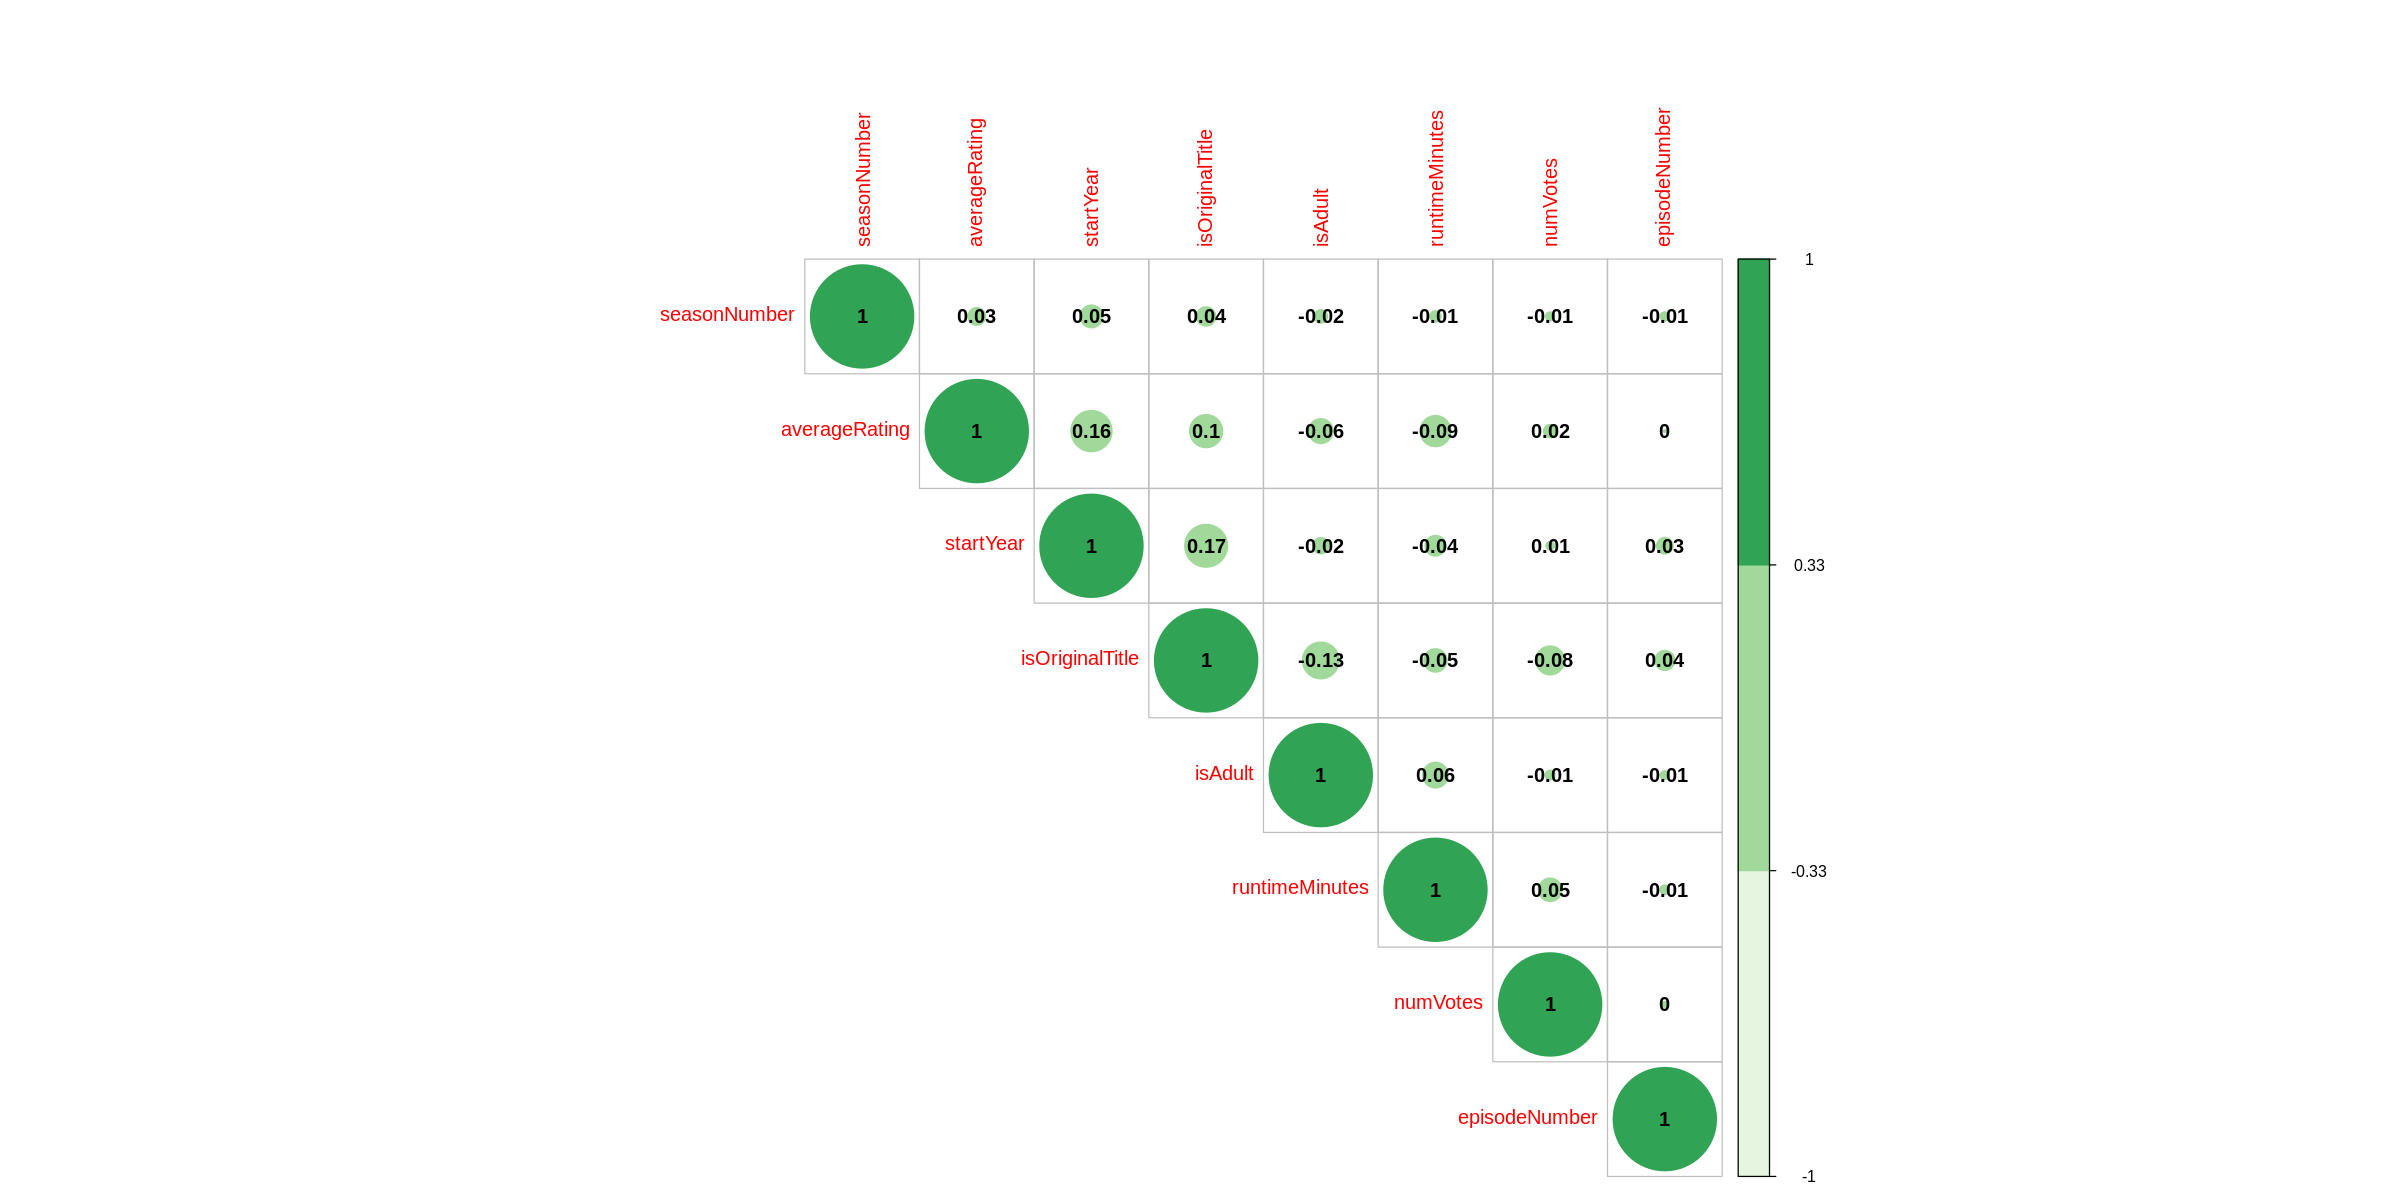

In [34]:
library(Hmisc)
library(corrplot)
library(RColorBrewer)
datos.rcorr = rcorr(as.matrix(datos[,c(1,2,4,5,6,9,10,13)]))
corrplot(datos.rcorr$r, type = "upper", order = "hclust",
         col = brewer.pal(n = 2, name = "Greens"), addCoef.col = "black", bg = "white")

LIMPIO BASE DE DATOS "RESULTADOS"

In [213]:
table(resultados$titleType)
resultados$titleType <- factor(resultados$titleType)
resultados$tvEpisode <- ifelse(resultados$titleType=='tvEpisode',1,0)
resultados$movie <- ifelse(resultados$titleType=='movie',1,0)
resultados$video <- ifelse(resultados$titleType=='video',1,0)
resultados$tvMovie <- ifelse(resultados$titleType=="tvMovie",1,0)
resultados$short <- ifelse(resultados$titleType=='short',1,0)
resultados$tvSeries <- ifelse(resultados$titleType=='tvSeries',1,0)
resultados$videoGame <- ifelse(resultados$titleType=="videoGames",1,0)
resultados$tvMiniSeries <- ifelse(resultados$titleType=="tvMiniSeries",1,0)
resultados$tvSpecial <- ifelse(resultados$titleType=="tvSpecial",1,0)
resultados$tvShort <- ifelse(resultados$titleType =="tvShort",1,0)
str(resultados$titleType)


                    movie        short    tvEpisode tvMiniSeries      tvMovie 
           3        77459        36977       143960         3177        13446 
    tvSeries      tvShort    tvSpecial        video    videoGame 
       21571          618         2835        18436         3450 

 Factor w/ 11 levels "","movie","short",..: 10 4 4 7 4 2 4 3 2 2 ...


In [214]:
table(resultados$isAdult)
resultados$isAdult[resultados$isAdult == "2020"] <- "0"
resultados$isAdult[is.na(resultados$isAdult)]<-"0"
resultados$isAdult <- factor(resultados$isAdult)
str(resultados$isAdult)


     0      1   2014 
315803   6125      1 

 Factor w/ 3 levels "0","1","2014": 1 1 1 1 1 1 1 1 1 1 ...


In [215]:
resultados$startYear[resultados$startYear == ""] <- NA
resultados$startYear[resultados$startYear == "\\N"] <- NA
resultados$startYear<-as.numeric(resultados$startYear)
resultados$startYear[is.na(resultados$startYear)]=median(resultados$startYear,na.rm=TRUE)
str(resultados$startYear)

 num [1:321932] 1999 2007 1971 2001 2014 ...


In [216]:
resultados$endYear[resultados$endYear == "\\N"] <- NA
resultados$endYear[resultados$endYear == " "] <- NA
resultados$endYear<-as.numeric(resultados$endYear)
resultados$endYear <- ifelse(is.na(resultados$endYear),2021,resultados$endYear)

In [217]:
table(resultados$episodeNumber)
resultados$episodeNumber[resultados$episodeNumber == ""] <- "\\N"
resultados$episodeNumber<-as.numeric(resultados$episodeNumber)
resultados$episodeNumber[is.na(resultados$episodeNumber)]= median(resultados$episodeNumber,na.rm=TRUE)


          \\N      0      1     10    100   1000   1001  10026   1003   1004 
177976   3959    304  11771   5611     64      2      1      1      2      2 
  1005   1006   1009    101   1010   1014   1015   1017   1018   1019    102 
     1      1      1     55      1      1      1      2      1      1     51 
  1021  10212   1022   1023  10232    103   1033   1034   1035   1036   1039 
     1      1      1      1      1     47      2      2      1      1      1 
   104   1040   1041   1044  10440   1045   1046   1047  10470   1048  10485 
    54      1      2      1      1      2      1      1      1      1      1 
  1049    105   1050   1051   1052   1053   1054   1055  10563  10564   1057 
     1     52      2      1      1      1      2      1      1      1      1 
 10578  10583  10586   1059  10598    106   1060   1061   1062   1063   1064 
     1      1      1      1      1     51      2      1      2      1      1 
  1065   1067  10673   1068   1069    107   1070  10704   1071 

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [218]:
table(resultados$runtimeMinutes)
resultados$runtimeMinutes[resultados$runtimeMinutes == ""] <- "\\N"
resultados$runtimeMinutes=as.numeric(resultados$runtimeMinutes)
resultados$runtimeMinutes[is.na(resultados$runtimeMinutes)]=median(resultados$runtimeMinutes,na.rm=TRUE)


                  \\N          1         10        100        101        102 
         3      84846        980       3026       2823        997       1099 
       103        104       1040        105        106        107        108 
       910        935          2       1502        720        732        751 
      1080        109         11        110       1100        111        112 
         2        534       2664       1243          1        453        536 
       113        114       1140        115        116        117        118 
       467        438          1        628        395        367        473 
       119         12        120       1200        121        122        123 
       370       2219       2105          1        278        267        285 
      1234        124       1248        125        126        127        128 
         1        269          1        383        257        256        245 
       129       1290         13        130        131        1

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [219]:
table(resultados$runtime)
resultados$runtime[resultados$runtime == ""] <- "\\N"
resultados$runtime=as.numeric(resultados$runtime)
resultados$runtime[is.na(resultados$runtime)]=median(resultados$runtime,na.rm=TRUE)
str(resultados$runtime)


   0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15 
 424   42    9   18   12   19   20   32   18   11   24   14   10   11   14   12 
  16   17   18   19   20   21   22   23   24   25   26   27   28   29   30   31 
  15   11   15    5   14    2    6    5   10   13   10   12    6    4   20    6 
  32   33   34   35   36   37   38   39   40   41   42   43   44   45   46   47 
   4    2    3    7    4    2    9    4   10    5   13    6   11   21   10   11 
  48   49   50   51   52   53   54   55   56   57   58   59   60   61   62   63 
  14    9   25    6   25   18   18   20   16   21   22   22   79   27   33   36 
  64   65   66   67   68   69   70   71   72   73   74   75   76   77   78   79 
  35   35   33   41   46   34   83   60   91   64   80  127   96   91  124  105 
  80   81   82   83   84   85   86   87   88   89   90   91   92   93   94   95 
 265  132  200  225  272  390  297  343  381  331  850  353  387  408  409  492 
  96   97   98   99  100  1

 num [1:321932] 94 94 94 94 94 136 94 94 94 94 ...


In [220]:
table(resultados$revenue)
resultados$revenue[resultados$revenue == ""] <- "\\N"
resultados$revenue=as.numeric(resultados$revenue)
resultados$revenue[is.na(resultados$revenue)]=median(resultados$revenue,na.rm=TRUE)
str(resultados$revenue)


         0          1          2          3          4          5          6 
     12424          4          2          4          2          2          2 
         7          8         10         11         12         13         15 
         1          1          2          2          2          1          1 
        19         21         23         25         27         28         30 
         1          1          1          2          1          1          1 
        43         44         58         70         80         82         83 
         1          1          1          1          1          1          1 
        85        100        135        140        228        241        264 
         1          1          1          1          2          1          1 
       288        306        344        399        404        525        809 
         1          1          1          1          1          1          1 
       831       1081       1378       1404       1632       19

 num [1:321932] 0 0 0 0 0 0 0 0 0 0 ...


In [221]:
table(resultados$popularity)
resultados$popularity[resultados$popularity == ""] <- "\\N"
resultados$popularity=as.numeric(resultados$popularity)
resultados$popularity[is.na(resultados$popularity)]=median(resultados$popularity,na.rm=TRUE)
str(resultados$popularity)


         0      1e-06      2e-06      3e-06      4e-06      7e-06      8e-06 
        18         15          3          3          1          5          2 
     9e-06    1.3e-05    1.8e-05    1.9e-05    2.1e-05    2.3e-05    2.9e-05 
         2          2          1          1          4          2          1 
   3.5e-05    3.8e-05    4.2e-05      5e-05      6e-05    6.9e-05    7.3e-05 
         1          3          2          1          1          1          2 
   7.4e-05    9.1e-05    9.4e-05   0.000108   0.000112   0.000132   0.000133 
         2          1          1          1          1          1          1 
   0.00015   0.000151   0.000157   0.000177   0.000189      2e-04    0.00022 
         1          1          1          1          1          1          7 
  0.000285   0.000287   0.000291   0.000308   0.000331   0.000344   0.000431 
         1          1          1          9          1          1          2 
  0.000469   0.000559   0.000561   0.000571   0.000578   0.0005

 num [1:321932] 1.3 1.3 1.3 1.3 1.3 ...


In [222]:
table(resultados$budget)
resultados$budget[resultados$budget == ""] <- "\\N"
resultados$budget=as.numeric(resultados$budget)
resultados$budget[is.na(resultados$budget)]=median(resultados$budget,na.rm=TRUE)
str(resultados$budget)


        0         1         2         3         4         5         6         7 
    11999         9         3         3         2         2         1         2 
        8        10        11        15        17        18        30        35 
        1         2         1         2         1         1         4         1 
       45        50        68        75        80        86        93        96 
        1         1         1         1         1         1         2         1 
      100       108       110       117       118       120       144       200 
        4         2         5         1         1         1         1         2 
      210       229       250       280       340       400       450       500 
        1         1         1         1         2         2         1         1 
      520       575       686       768      1000      2000      2100      2500 
        1         1         1         1         1         1         1         1 
     3000      5000      59

 num [1:321932] 0 0 0 0 0 0 0 0 0 0 ...


In [223]:
table(resultados$ordering)
resultados$ordering[resultados$ordering == ""] <- "\\N"
resultados$ordering=as.numeric(resultados$ordering)
resultados$ordering[is.na(resultados$ordering)]=median(resultados$ordering,na.rm=TRUE)
str(resultados$ordering)


    1     2     3     4     5     6     7     8     9    10    11    12    13 
46027 38925 10447  5701  3737  2768  2193  1653  1342  1099  1001   821   691 
   14    15    16    17    18    19    20    21    22    23    24    25    26 
  613   565   531   429   361   315   289   296   254   210   196   183   167 
   27    28    29    30    31    32    33    34    35    36    37    38    39 
  152   145   127    98    79    75    75    52    54    55    49    44    42 
   40    41    42    43    44    45    46    47    48    49    50    51    52 
   33    28    35    18    26    23    11    13    15     6    10     7    11 
   53    54    55    56    57    58    59    60    61    62    63    64    67 
    5     5    10     4     1     2     3     4     1     3     2     2     1 
   70    78    86   106   137   138   146   162 
    1     1     1     1     1     1     1     1 

 num [1:321932] 1 2 2 2 2 14 2 2 2 2 ...


In [224]:
resultados$isOriginalTitle <- ifelse(is.na(resultados$isOriginalTitle),2021,resultados$isOriginalTitle)

In [225]:
#Trabajo los missings
mean(is.na(resultados$numVotes))
mean(is.na(resultados$titleType))
mean(is.na(resultados$isAdult))
mean(is.na(resultados$startYear))
mean(is.na(resultados$endYear))
mean(is.na(resultados$runtimeMinutes))
mean(is.na(resultados$genres_x))
mean(is.na(resultados$directors))
mean(is.na(resultados$writers))
mean(is.na(resultados$seasonNumber))
mean(is.na(resultados$episodeNumber))
mean(is.na(resultados$ordering))
mean(is.na(resultados$language))
mean(is.na(resultados$types))
mean(is.na(resultados$attributes))
mean(is.na(resultados$isOriginalTitle))
mean(is.na(resultados$adult))
mean(is.na(resultados$budget))
mean(is.na(resultados$genres_y))
mean(is.na(resultados$original_language))
mean(is.na(resultados$overview))
mean(is.na(resultados$popularity))
mean(is.na(resultados$production_companies))
mean(is.na(resultados$production_countries))
mean(is.na(resultados$release_date))
mean(is.na(resultados$revenue))
mean(is.na(resultados$runtime))
mean(is.na(resultados$status))
mean(is.na(resultados$tagline))
mean(is.na(resultados$video))

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

[1] 0

In [226]:
#Cuento cantidad de missings 
colSums(is.na(resultados))

numVotes            titleType              isAdult 
                   0                    0                    0 
           startYear              endYear       runtimeMinutes 
                   0                    0                    0 
            genres_x            directors              writers 
                   0                    0                    0 
        seasonNumber        episodeNumber             ordering 
                   0                    0                    0 
            language                types           attributes 
                   0                    0                    0 
     isOriginalTitle                adult               budget 
                   0                    0                    0 
            genres_y    original_language             overview 
                   0                    0                    0 
          popularity production_companies production_countries 
                   0                    0                    0 
        release_date              revenue              runtime 
                   0                    0                    0 
              status              tagline                video 
                   0                    0                    0 
                  id            tvEpisode                movie 
                   0                    0                    0 
             tvMovie                short             tvSeries 
                   0                    0                    0 
           videoGame         tvMiniSeries            tvSpecial 
                   0                    0                    0 
             tvShort 
                   0

In [227]:
resultados$directorbueno <- ifelse(resultados$directors %in% dr_buenos$directors,1,0)
resultados$directormalo <- ifelse(resultados$directors %in% dr_malos$directors,1,0)
resultados$writerbueno <- ifelse(resultados$writers %in% wr_buenos$writers,1,0)
resultados$writermalo <- ifelse(resultados$writers %in% wr_malos$writers,1,0)
resultados$titletypebueno <- ifelse(resultados$titleType %in% tty_buenos$titleType,1,0)
resultados$titletypmalo <- ifelse(resultados$titleType %in% tty_malos$titleType,1,0)
resultados$generobueno <- ifelse(resultados$genres_x %in% grx_buenos$genres_x,1,0)
resultados$generomalo <- ifelse(resultados$genres_x %in% grx_malos$genres_x,1,0)
resultados$generobueno <- ifelse(resultados$genres_y %in% gry_buenos$genres_y,1,0)
resultados$generomalo <- ifelse(resultados$genres_y %in% gry_malos$genres_y,1,0)
resultados$companiesbueno <- ifelse(resultados$production_companies %in% proco_buenos$production_companies,1,0)
resultados$companiesmalo <-ifelse(resultados$production_companies %in% proco_malos$production_companies,1,0)
resultados$countriesbueno <- ifelse(resultados$production_countries %in% procount_buenos$production_countries,1,0)
resultados$countriesmalo <-ifelse(resultados$production_countries %in% procount_malos$production_countries,1,0)

In [228]:
#Eliminamos variables 
resultados$endYear=NULL
resultados$ordering=NULL
resultados$lenguage=NULL
resultados$attributes=NULL
resultados$adult=NULL
resultados$budget=NULL
resultados$original_language=NULL
resultados$overview=NULL
resultados$popularity=NULL
resultados$release_date=NULL
resultados$revenue=NULL
resultados$status=NULL
resultados$tagline=NULL
resultados$video=NULL
resultados$genres_x=NULL
resultados$genres_y=NULL



In [229]:
#Regresion lineal 
regresion <- lm(averageRating ~ log(numVotes) + titleType + runtimeMinutes + startYear + seasonNumber + isAdult , data = datos)
summary(regresion)


Call:
lm(formula = averageRating ~ log(numVotes) + titleType + runtimeMinutes + 
    startYear + seasonNumber + isAdult, data = datos)

Residuals:
    Min      1Q  Median      3Q     Max 
-6.6772 -0.6725  0.1383  0.8344  7.5531 

Coefficients:
                        Estimate Std. Error t value Pr(>|t|)    
(Intercept)           -2.693e+00  9.271e-01  -2.905  0.00368 ** 
log(numVotes)          4.677e-02  7.883e-04  59.331  < 2e-16 ***
titleTypemovie        -1.551e+00  9.180e-01  -1.689  0.09115 .  
titleTypeshort        -8.071e-01  9.180e-01  -0.879  0.37925    
titleTypetvEpisode    -2.655e-01  9.180e-01  -0.289  0.77239    
titleTypetvMiniSeries -6.192e-01  9.181e-01  -0.674  0.50000    
titleTypetvMovie      -1.047e+00  9.180e-01  -1.141  0.25395    
titleTypetvSeries     -8.921e-01  9.180e-01  -0.972  0.33113    
titleTypetvShort      -7.809e-01  9.185e-01  -0.850  0.39524    
titleTypetvSpecial    -9.158e-01  9.181e-01  -0.997  0.31853    
titleTypevideo        -1.053e+00  9.180e

Warning message in abline(regresion):
“only using the first two of 16 regression coefficients”


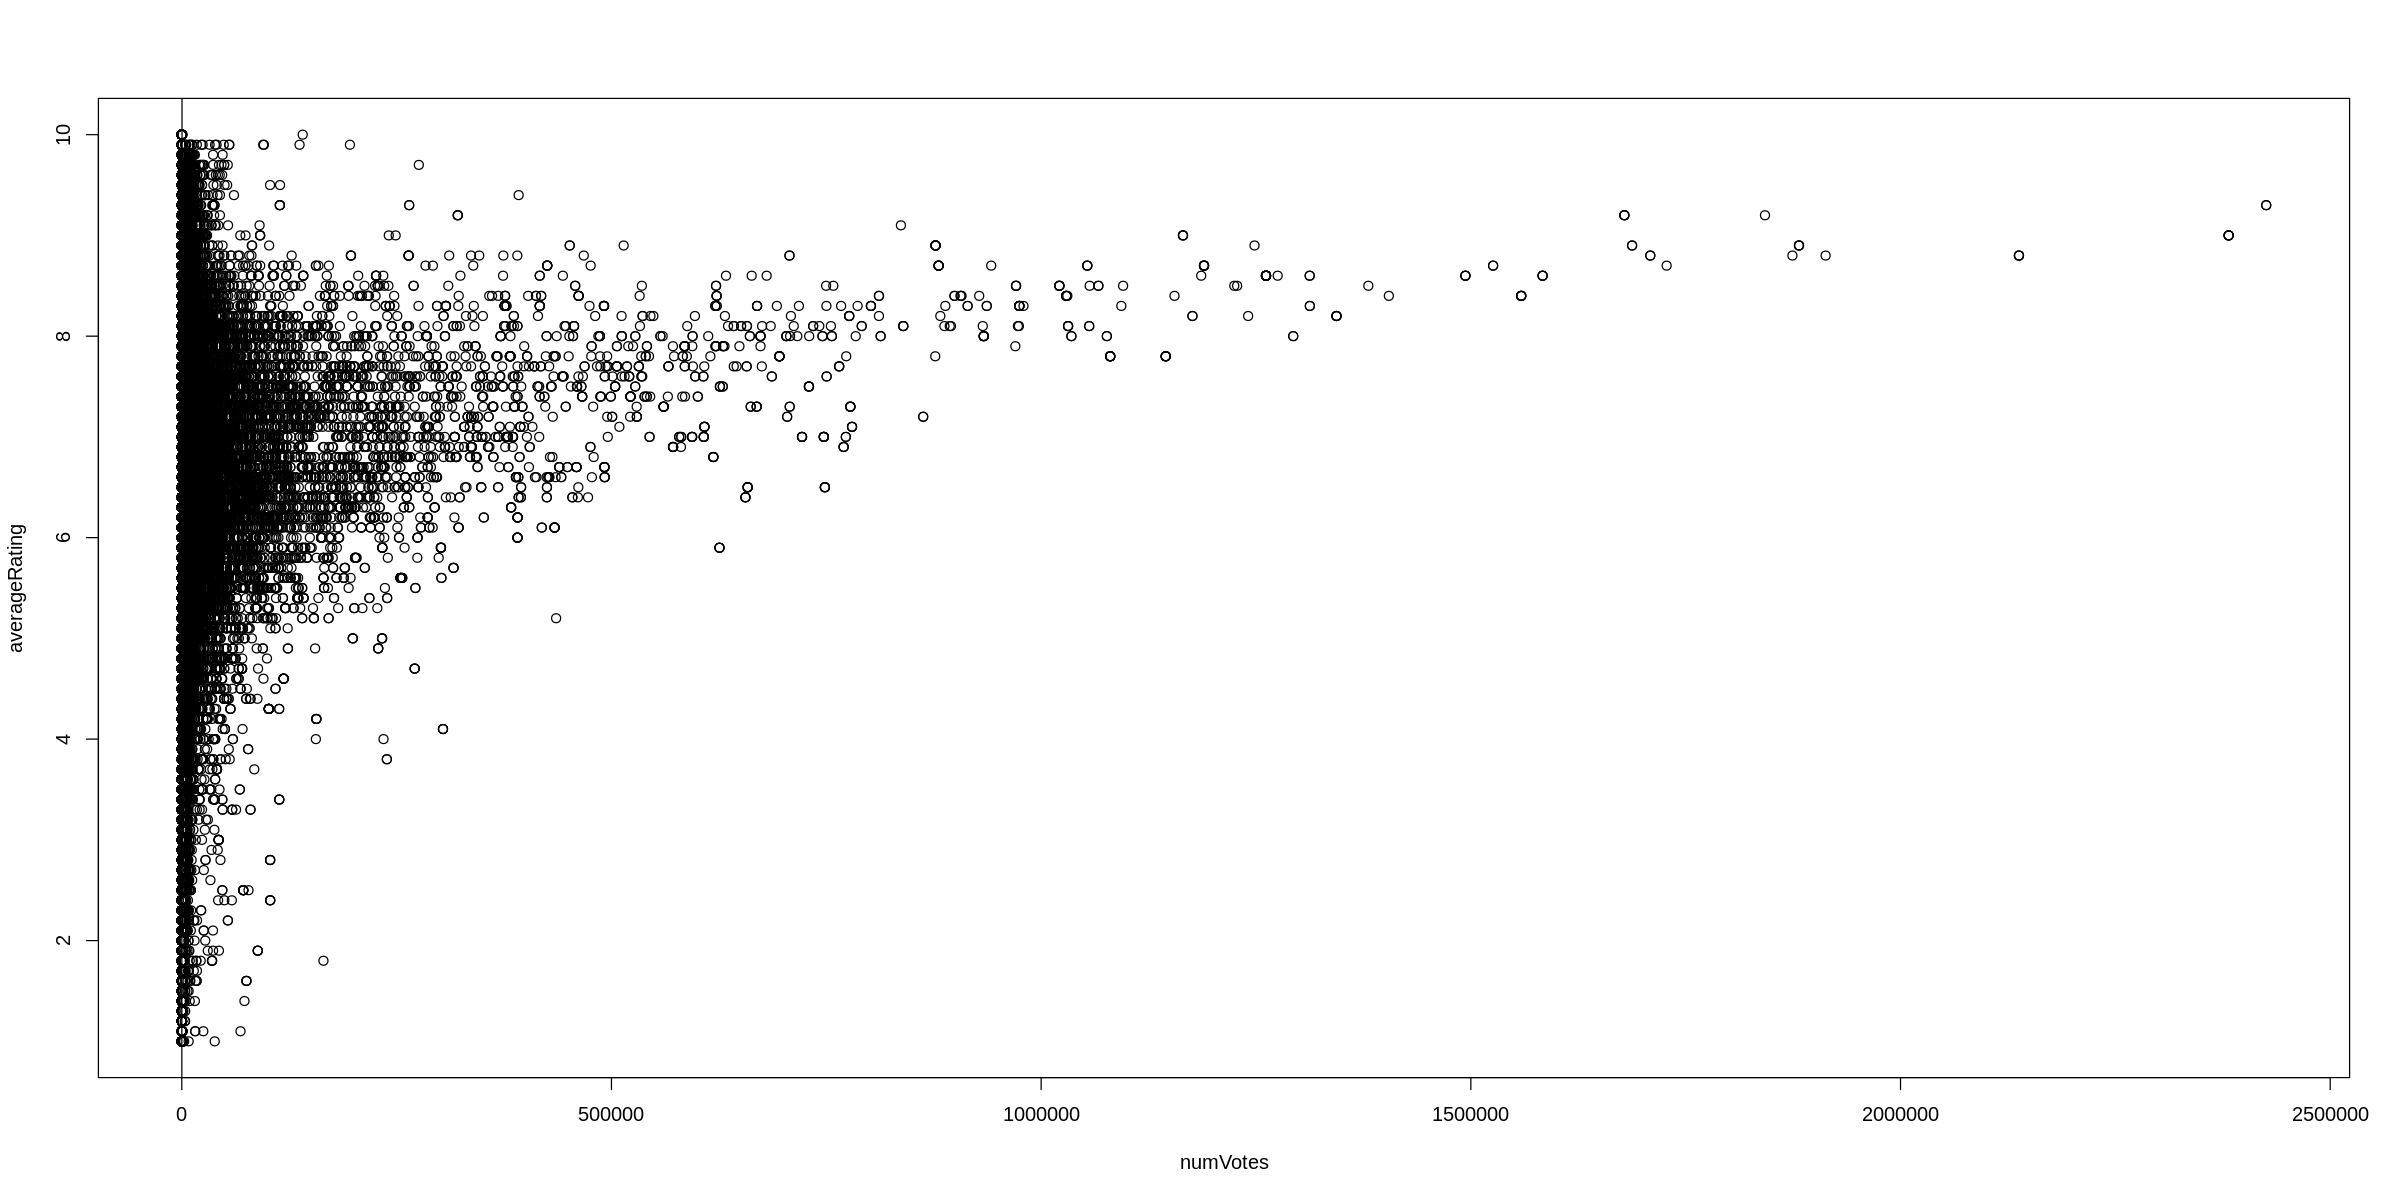

In [230]:
#Representación regresión lineal
plot(datos$numVotes, datos$averageRating, xlab='numVotes', ylab='averageRating')
abline(regresion)

Warning message in abline(regresion):
“only using the first two of 16 regression coefficients”


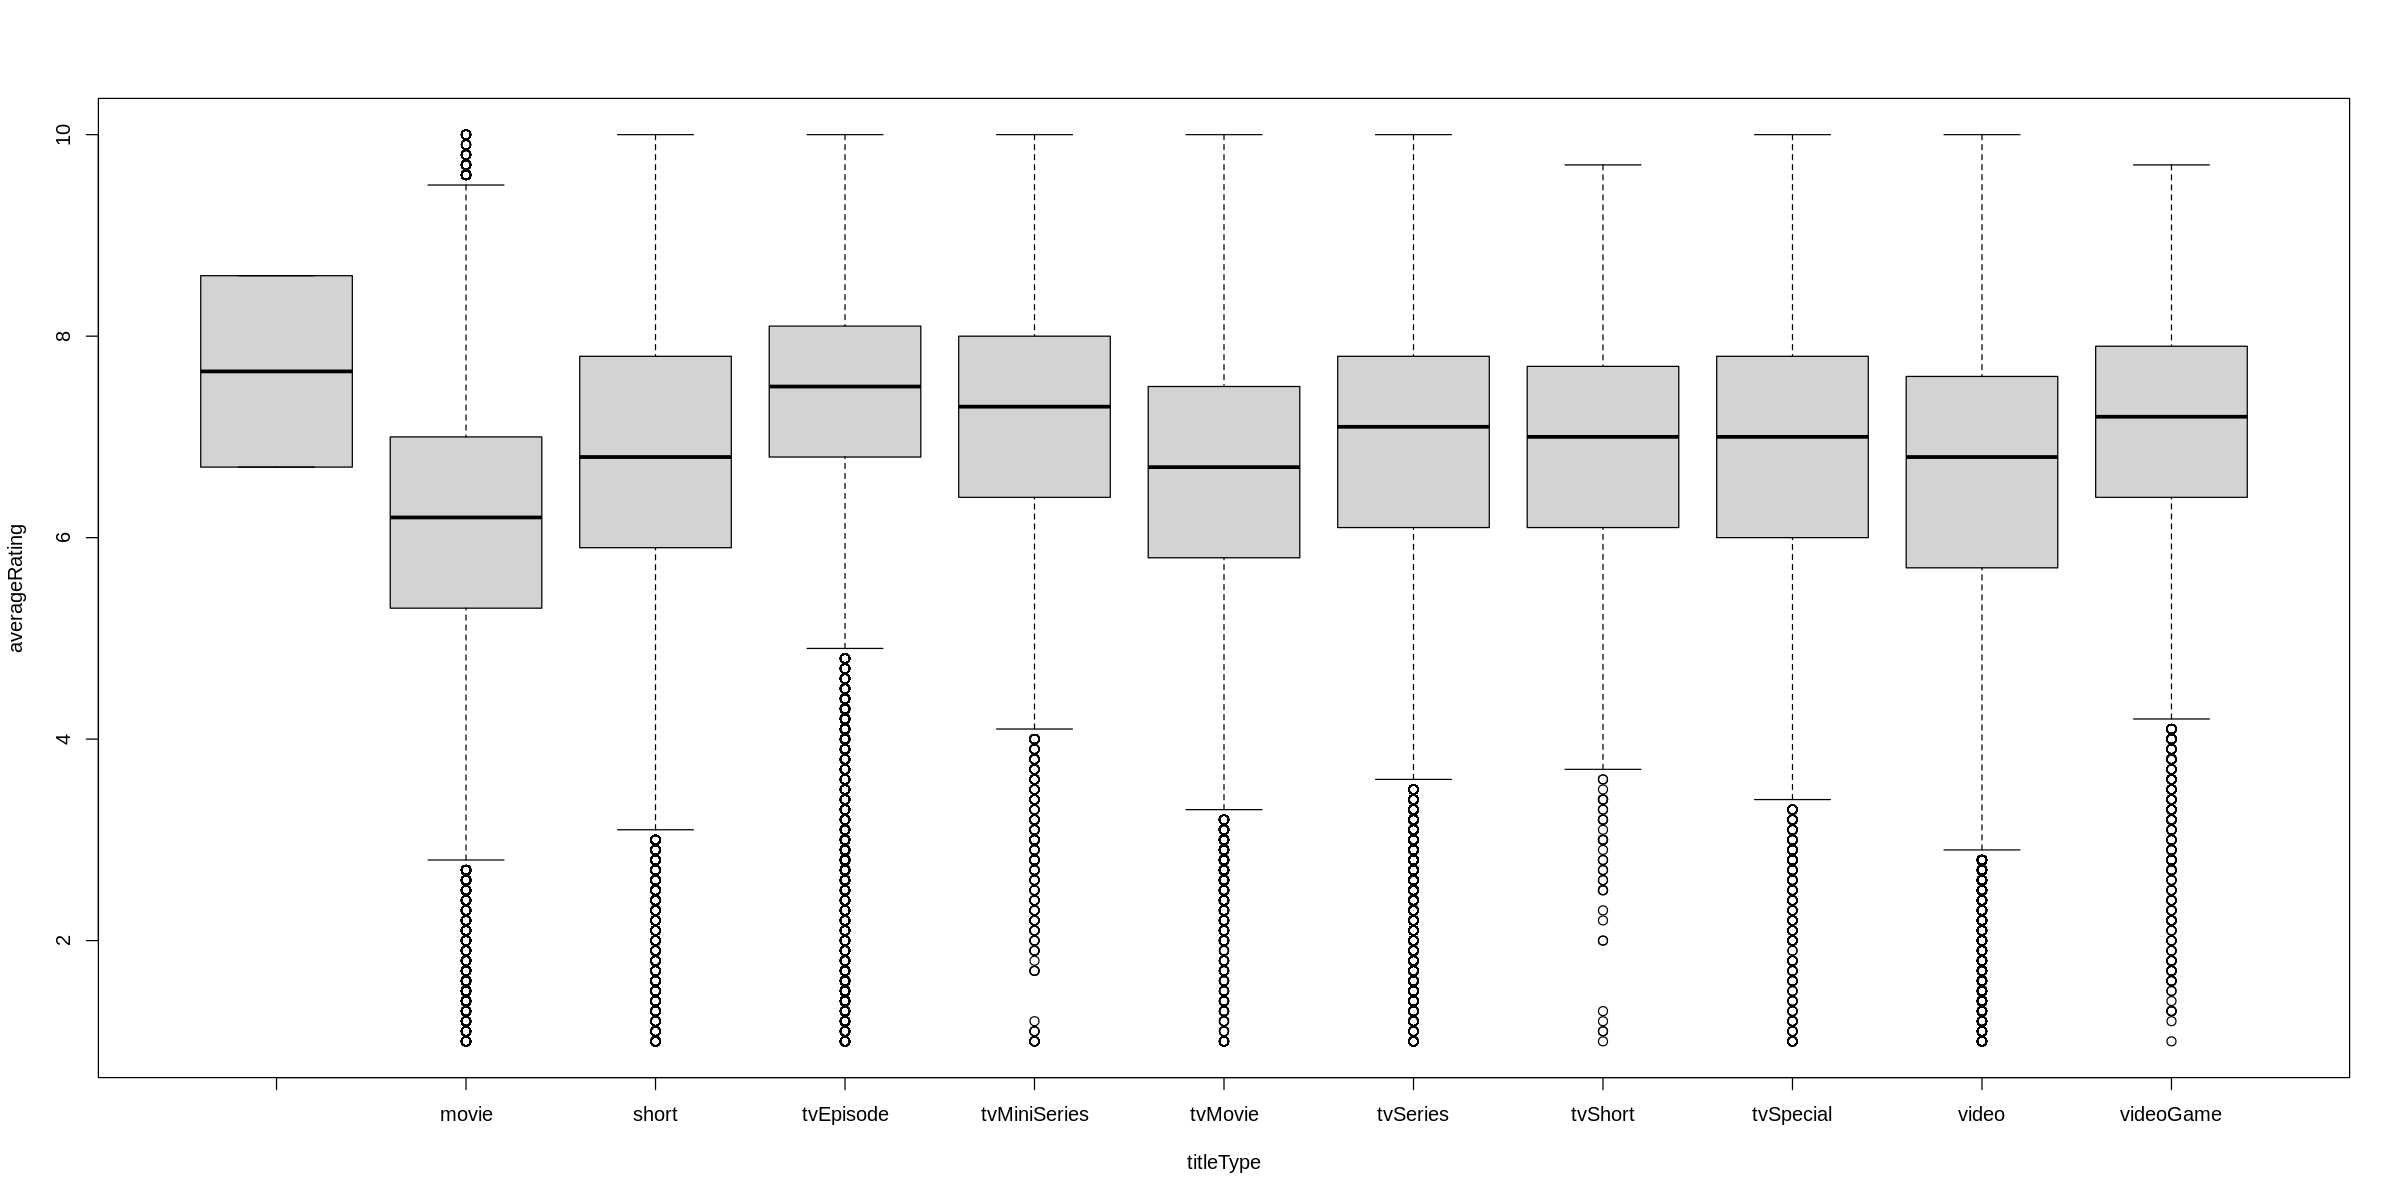

In [231]:
plot(datos$titleType, datos$averageRating, xlab='titleType', ylab='averageRating')
abline(regresion)

Warning message in abline(regresion):
“only using the first two of 16 regression coefficients”


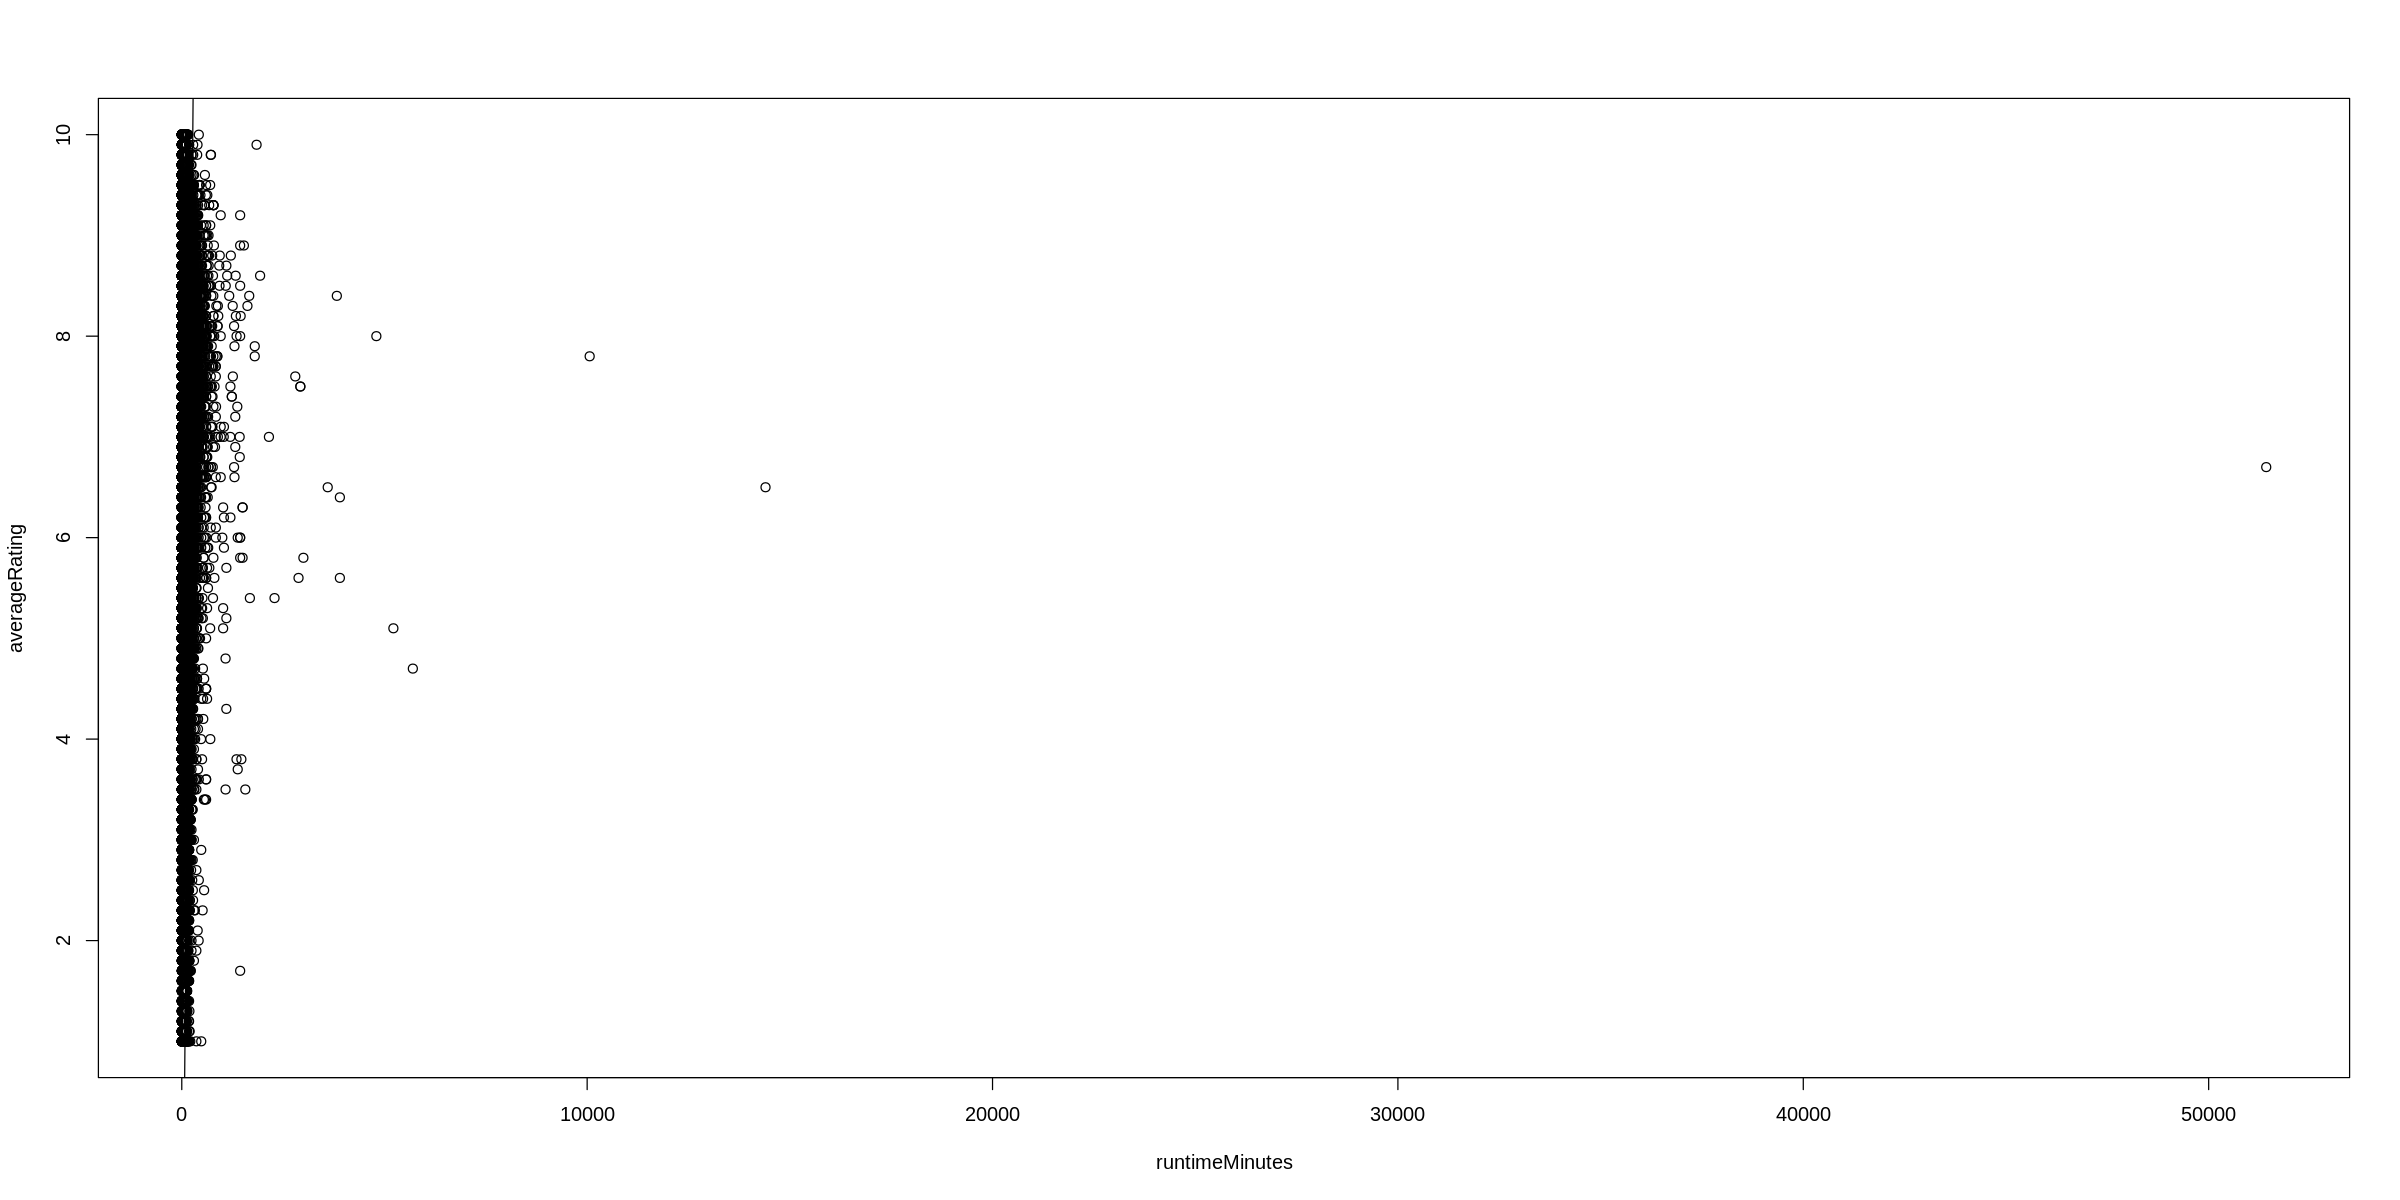

In [232]:
plot(datos$runtimeMinutes, datos$averageRating, xlab='runtimeMinutes', ylab='averageRating')
abline(regresion)

Warning message in abline(regresion):
“only using the first two of 16 regression coefficients”


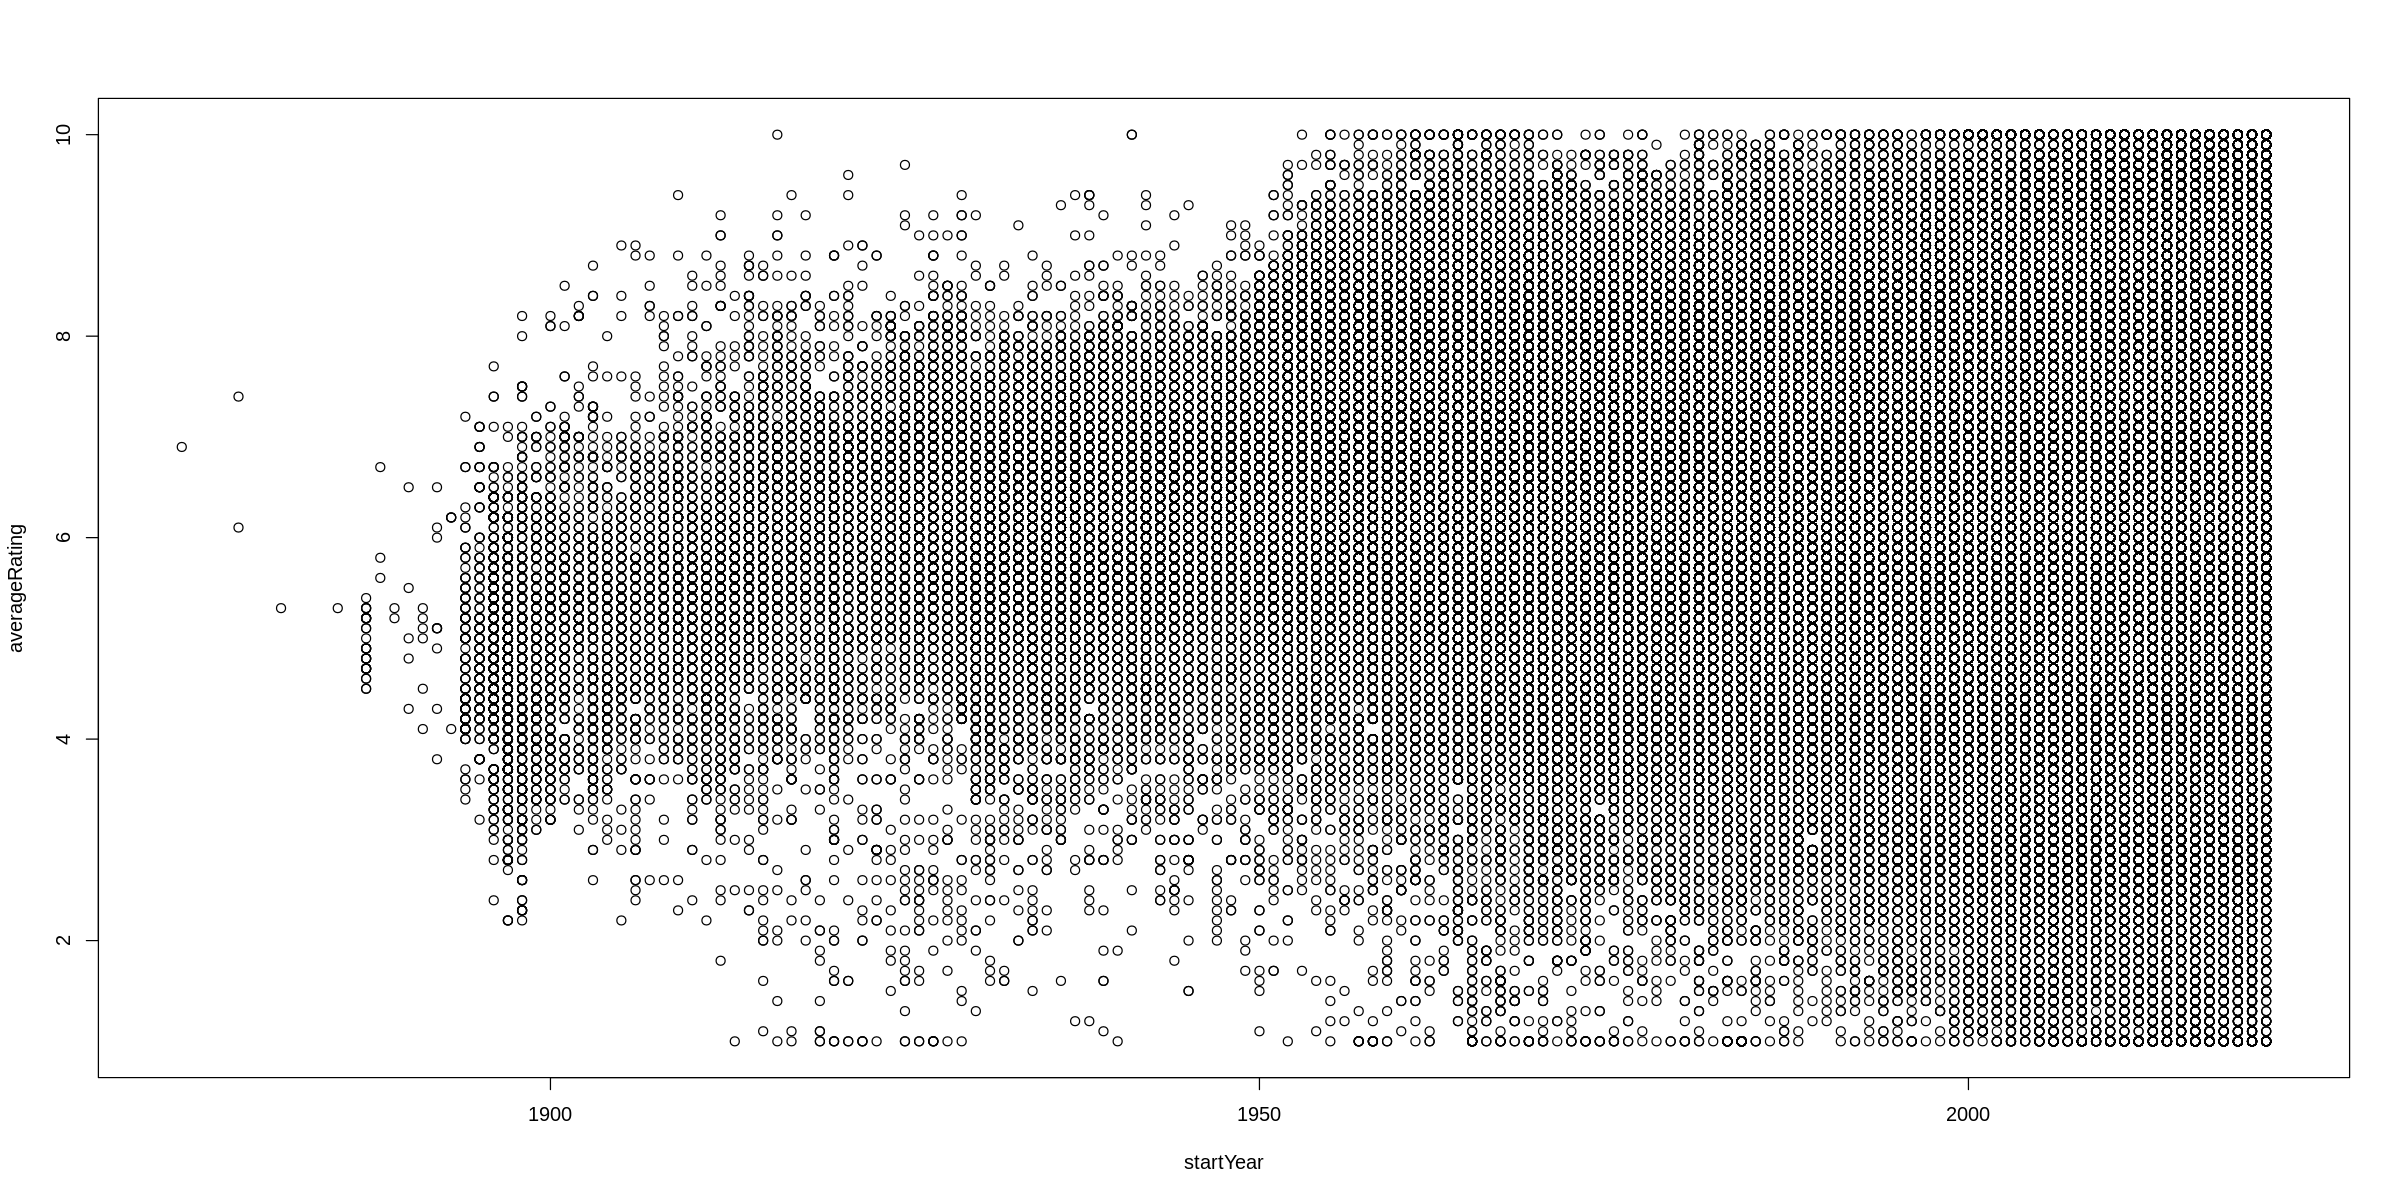

In [233]:
plot(datos$startYear, datos$averageRating, xlab='startYear', ylab='averageRating')
abline(regresion)

Warning message in abline(regresion):
“only using the first two of 16 regression coefficients”


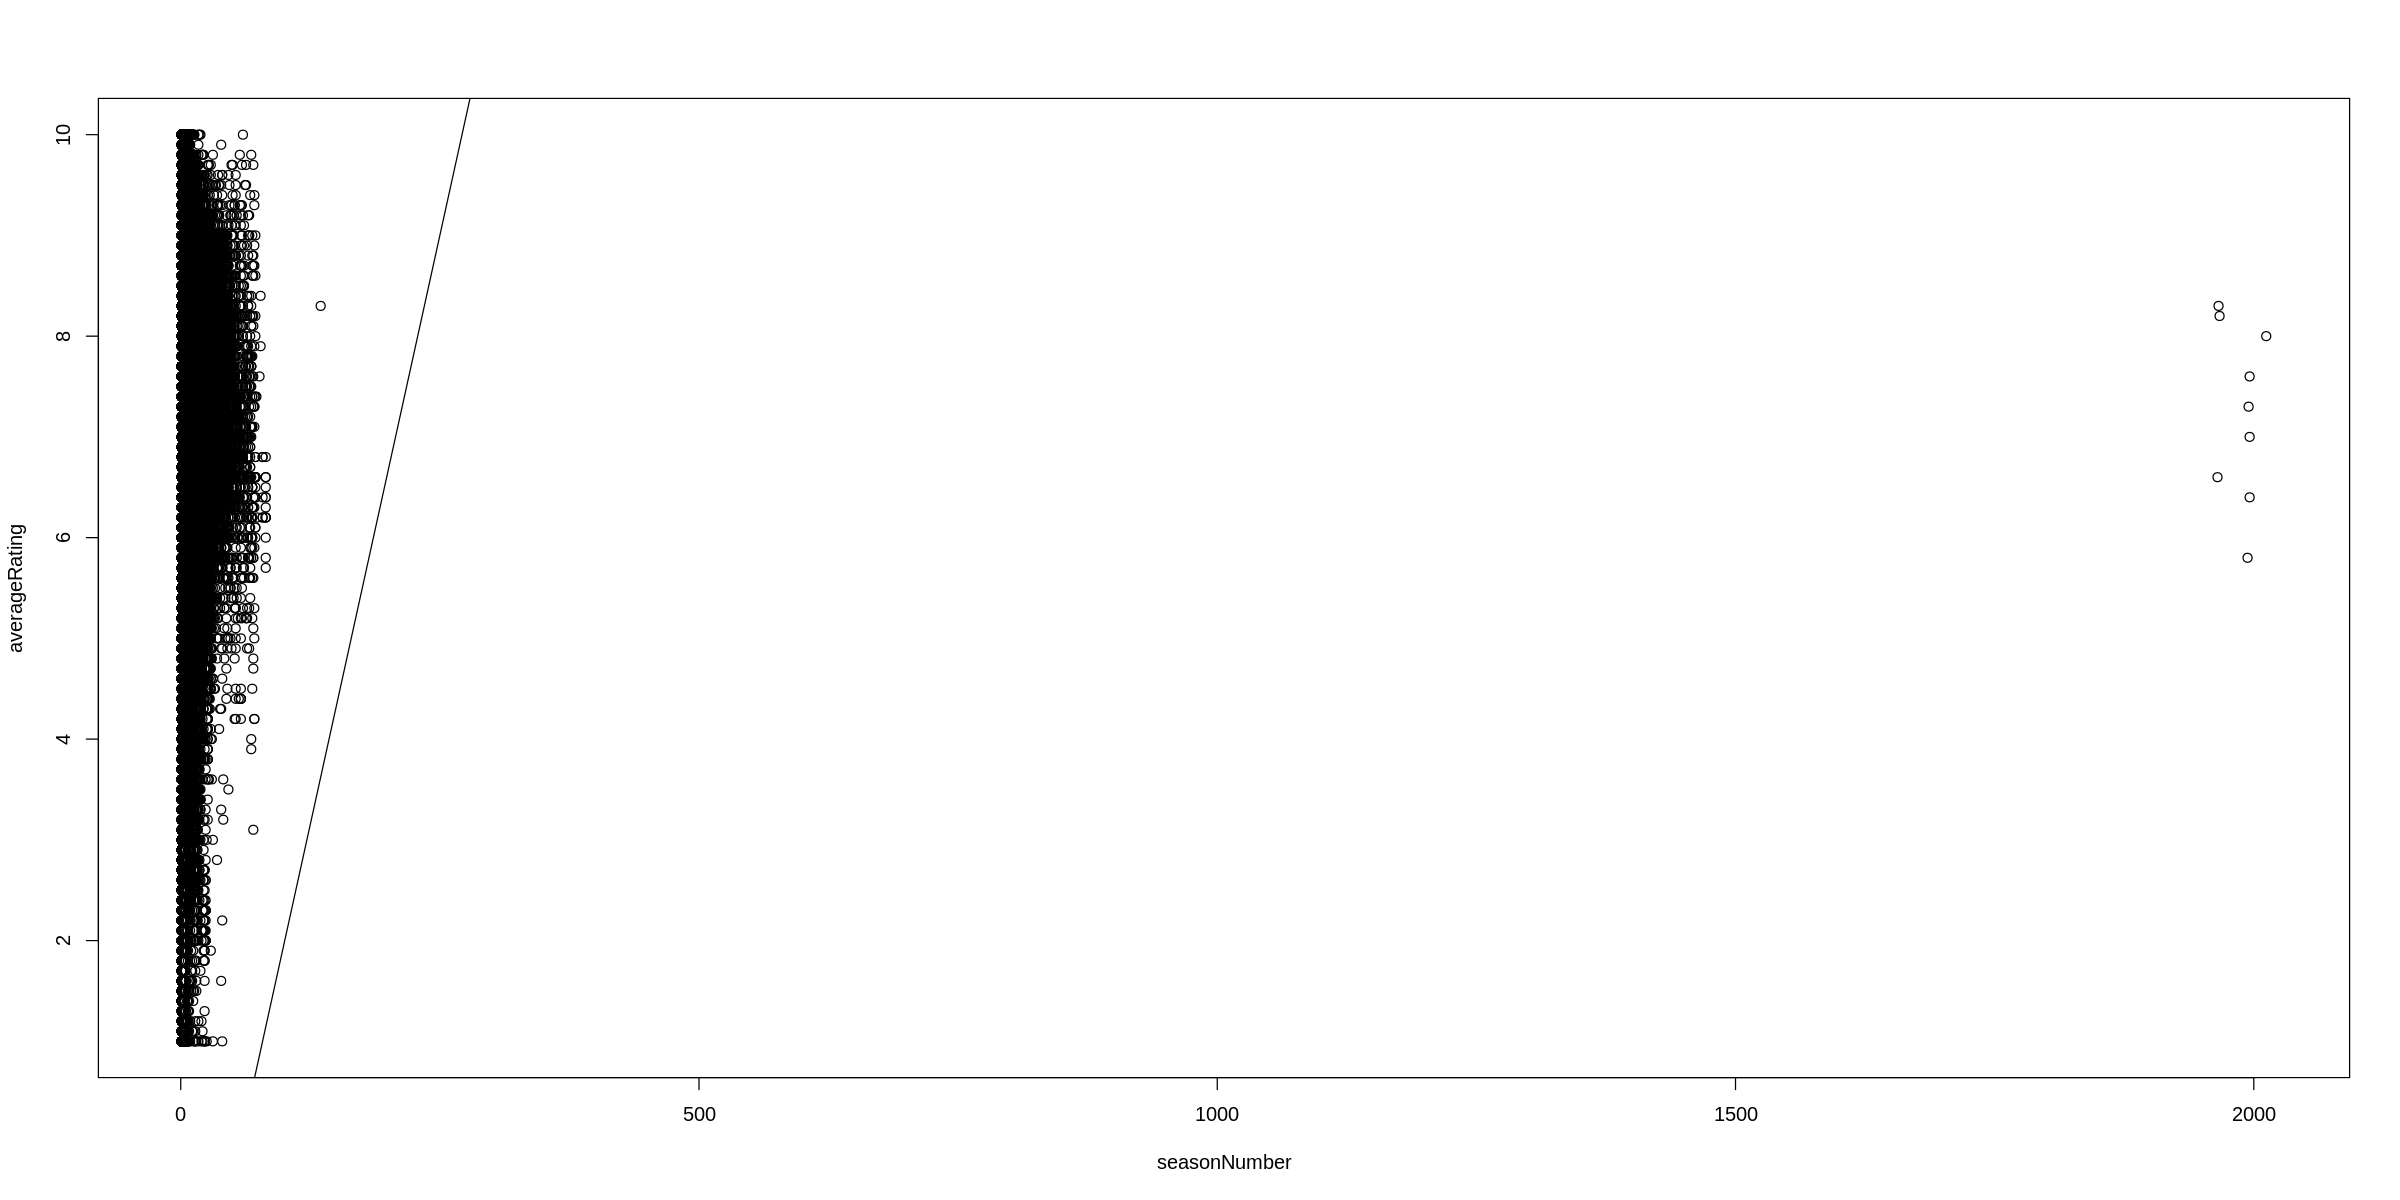

In [234]:
plot(datos$seasonNumber, datos$averageRating, xlab='seasonNumber', ylab='averageRating')
abline(regresion)

Warning message in abline(regresion):
“only using the first two of 16 regression coefficients”


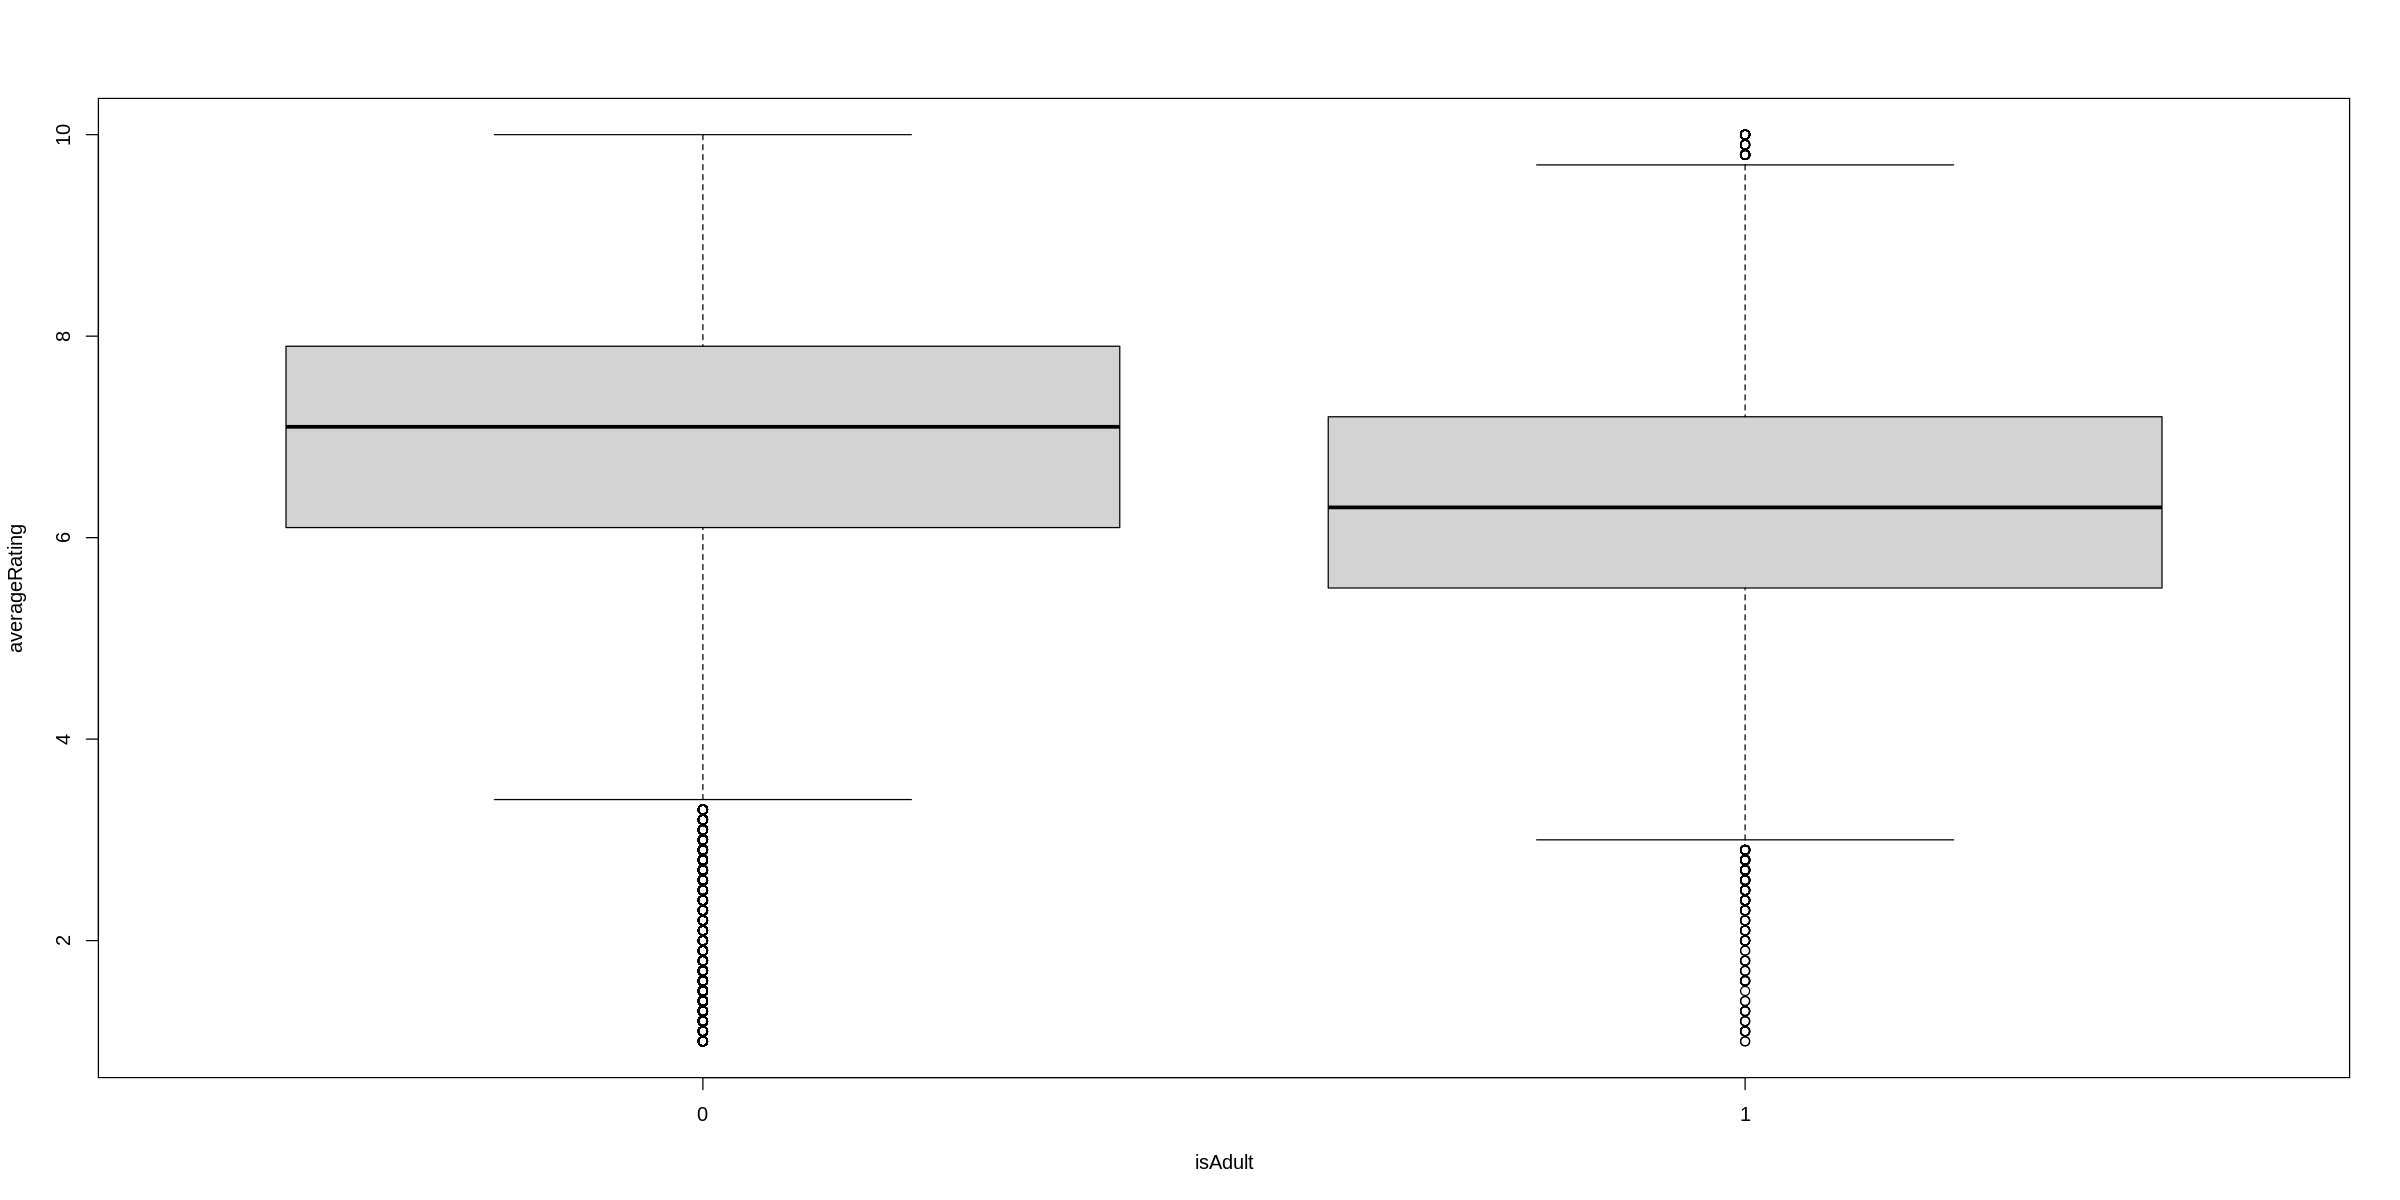

In [235]:
plot(datos$isAdult, datos$averageRating, xlab='isAdult', ylab='averageRating')
abline(regresion)

Warning message in abline(regresion):
“only using the first two of 16 regression coefficients”


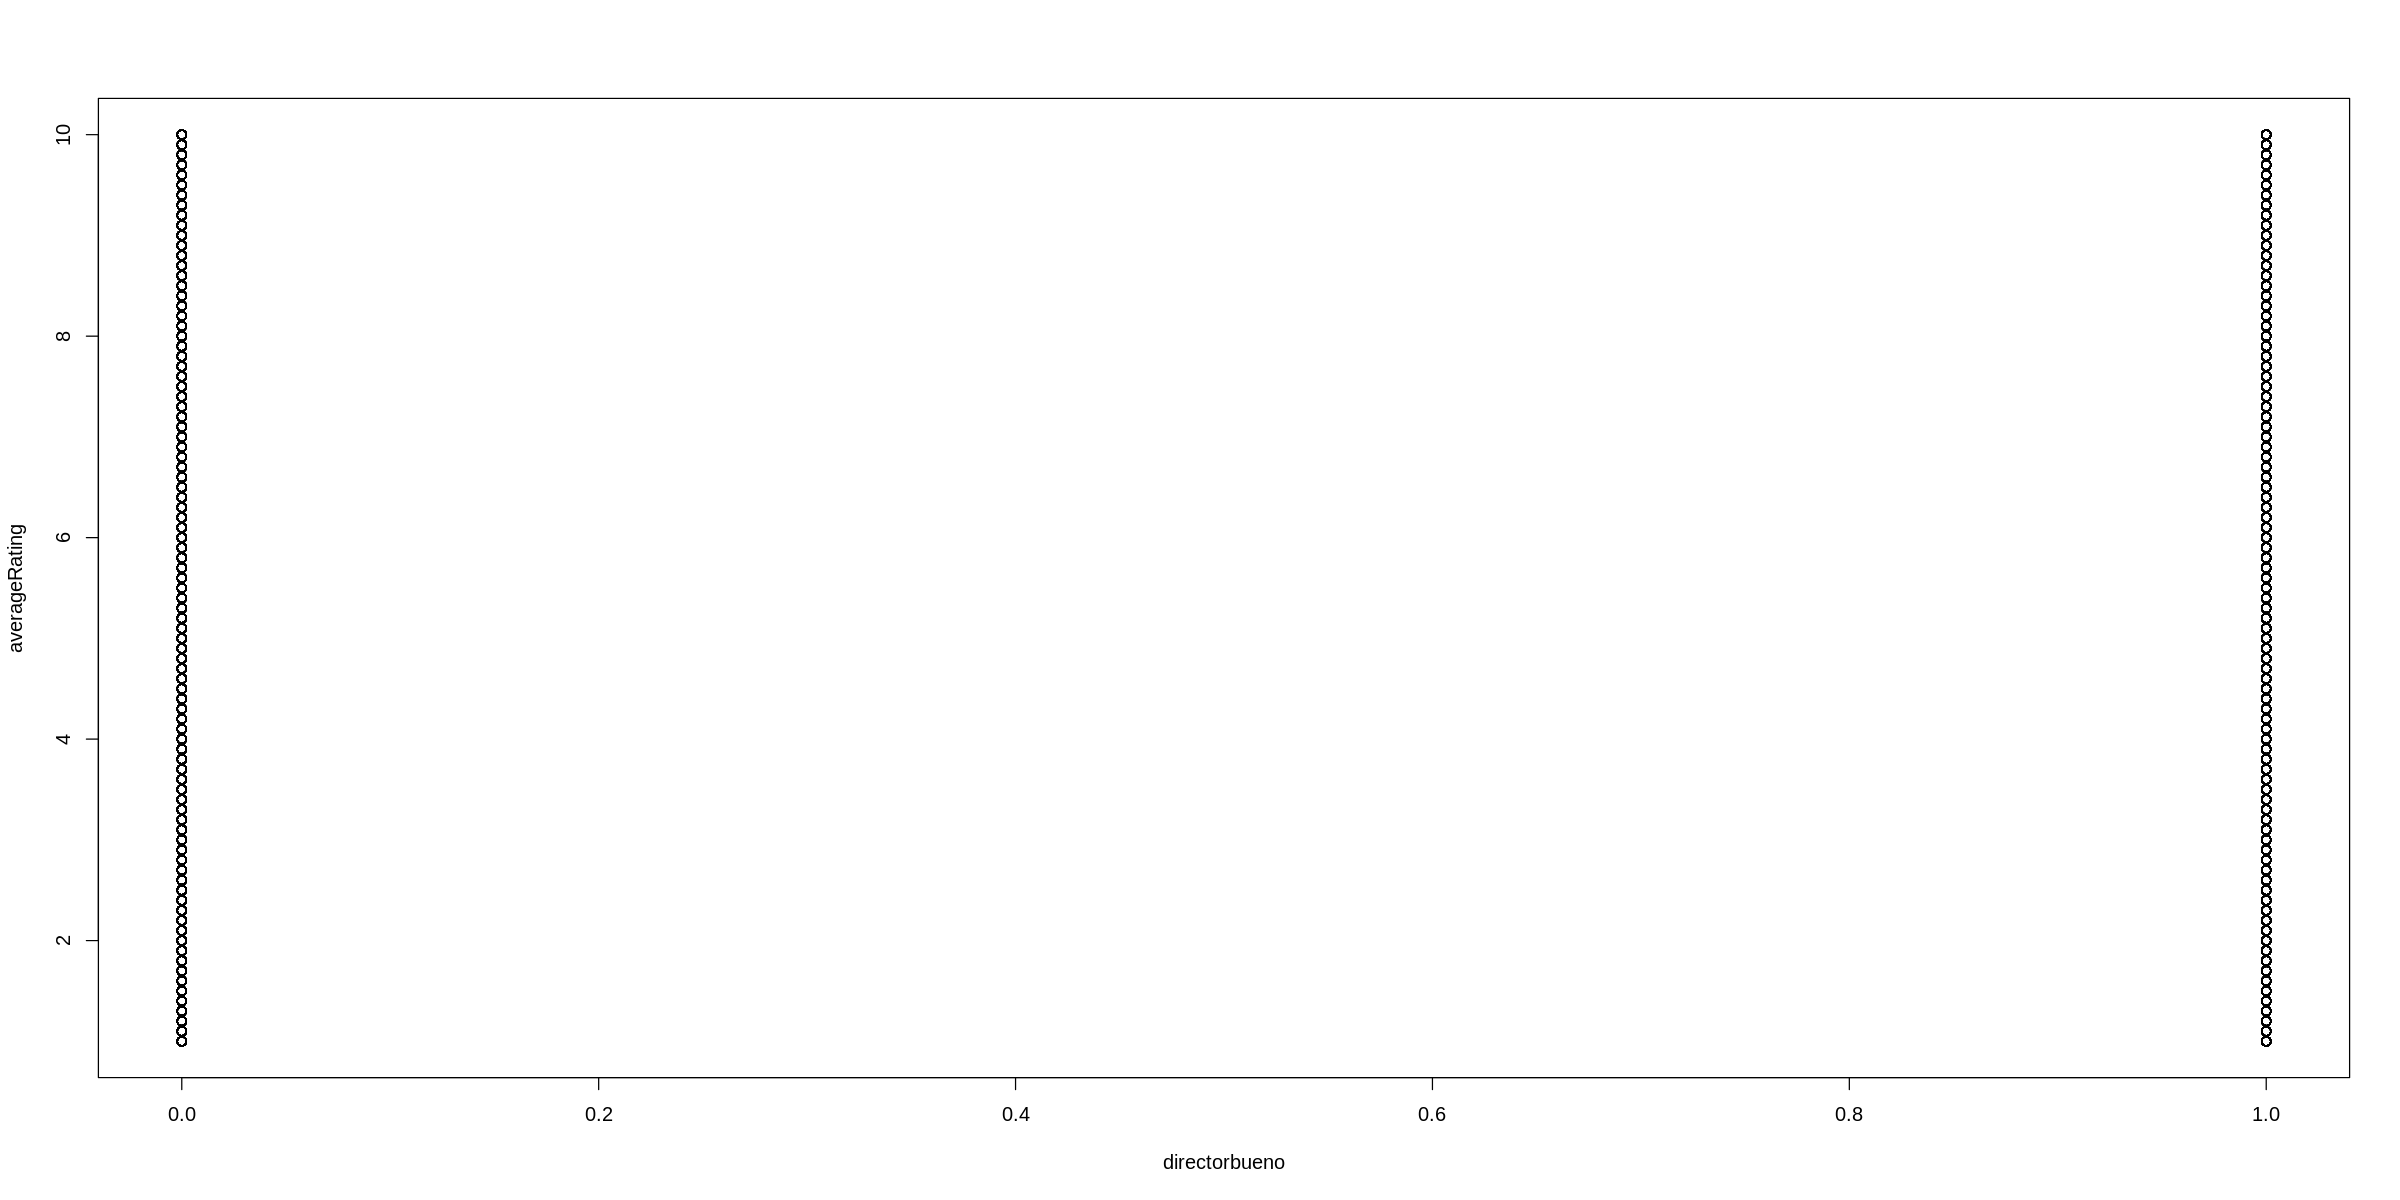

In [246]:
plot(datos$directorbueno, datos$averageRating, xlab='directorbueno', ylab='averageRating')
abline(regresion)

In [236]:
set.seed(222);particion=createDataPartition(y=datos$averageRating,p=0.7,list=FALSE)
entrenar=datos[particion,]
test=datos[-particion,]

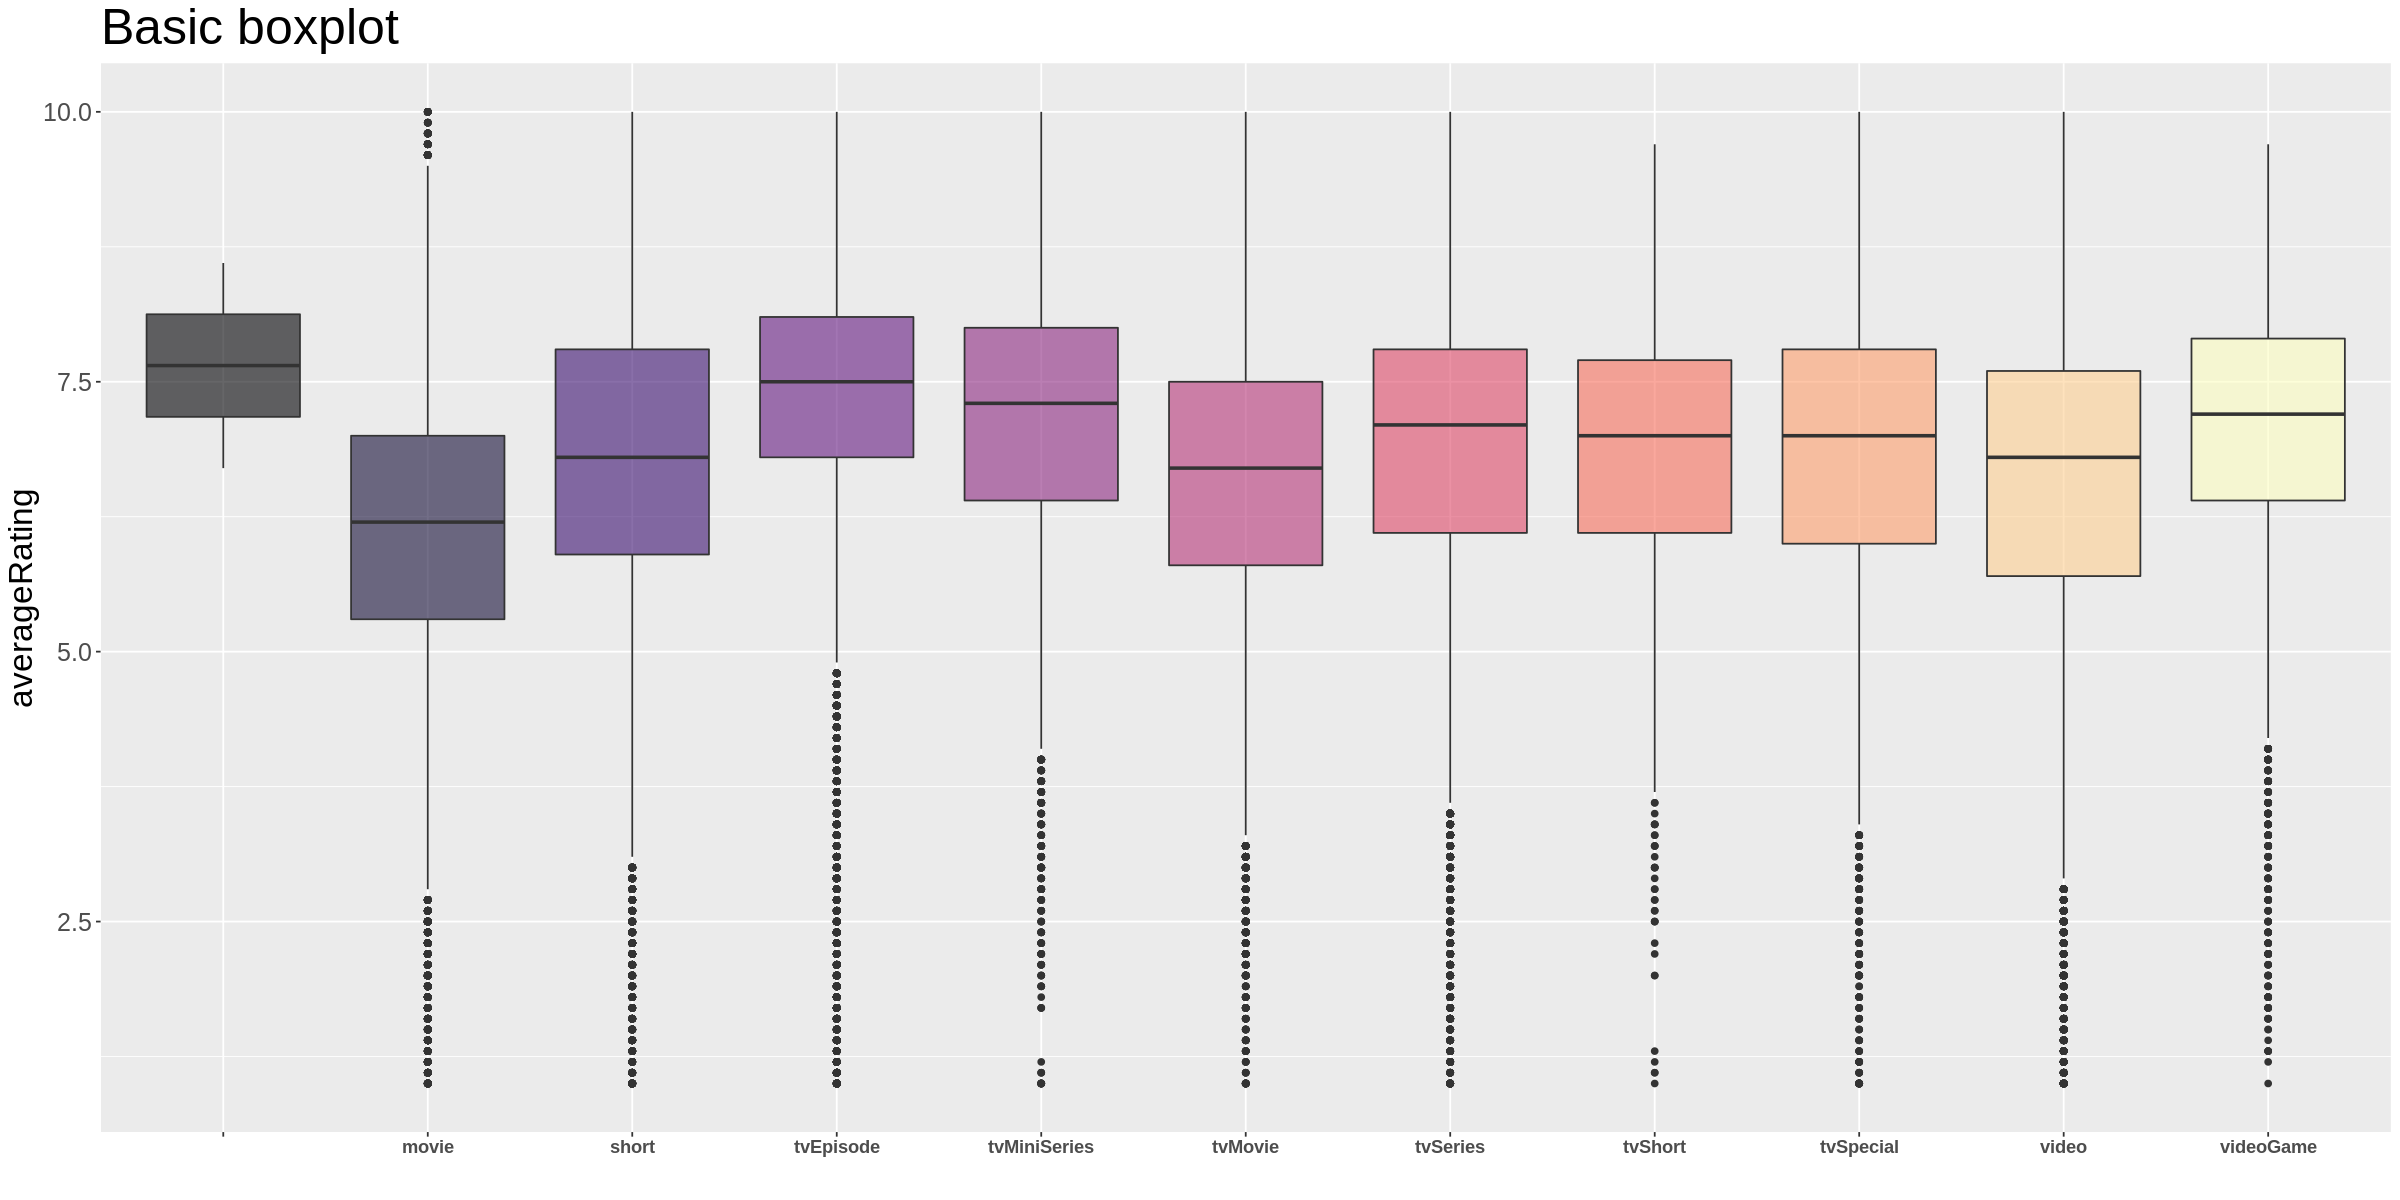

In [237]:
#Grafico 1

 options(repr.plot.width = 20, repr.plot.height = 10)

 
 ggplot(data= datos, aes(x=titleType, y=averageRating, fill=titleType)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Basic boxplot") +
    xlab("")+
    theme(axis.text.y = element_text(size = 15)) +
    theme(axis.text.x = element_text(face = "bold",size = 11)) +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20),
    axis.title = element_text(size = 20))


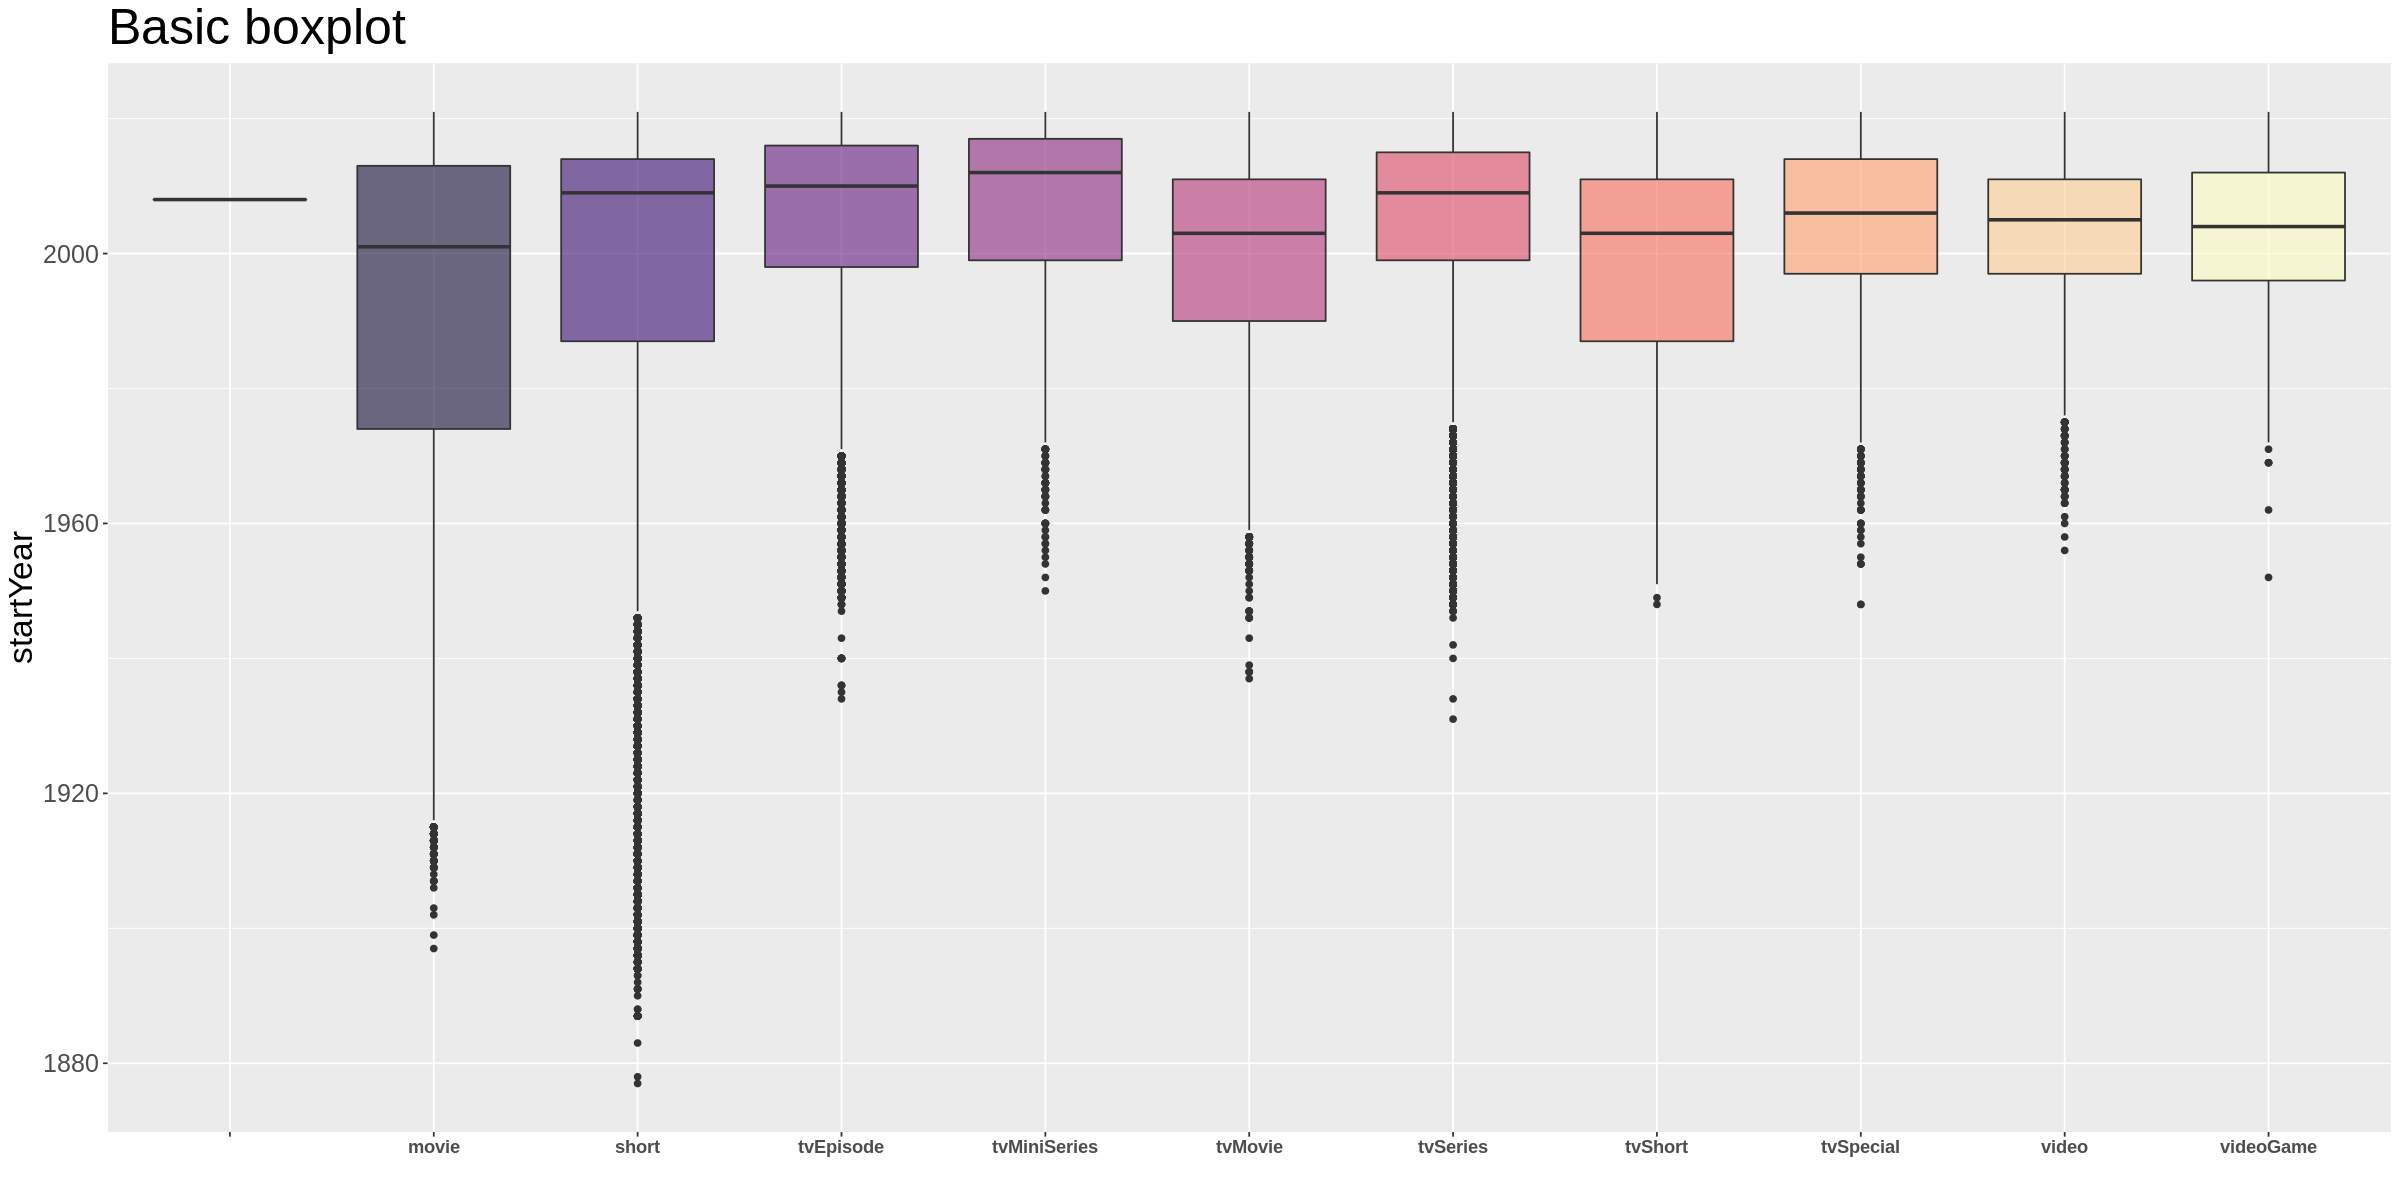

In [238]:
#Grafico 2

 options(repr.plot.width = 20, repr.plot.height = 10)

 
 ggplot(data= resultados, aes(x=titleType, y=startYear, fill=titleType)) +
    geom_boxplot() +
    scale_fill_viridis(discrete = TRUE, alpha=0.6, option="A") +
    theme(
      legend.position="none",
      plot.title = element_text(size=11)
    ) +
    ggtitle("Basic boxplot") +
    xlab("")+
    theme(axis.text.y = element_text(size = 15)) +
    theme(axis.text.x = element_text(face = "bold",size = 11)) +
    theme(plot.title = element_text(size = 30), plot.subtitle = element_text(size = 20),
    axis.title = element_text(size = 20))


List of 1
 $ text:List of 11
  ..$ family       : chr "Tahoma"
  ..$ face         : NULL
  ..$ colour       : NULL
  ..$ size         : NULL
  ..$ hjust        : NULL
  ..$ vjust        : NULL
  ..$ angle        : NULL
  ..$ lineheight   : NULL
  ..$ margin       : NULL
  ..$ debug        : NULL
  ..$ inherit.blank: logi FALSE
  ..- attr(*, "class")= chr [1:2] "element_text" "element"
 - attr(*, "class")= chr [1:2] "theme" "gg"
 - attr(*, "complete")= logi FALSE
 - attr(*, "validate")= logi TRUE

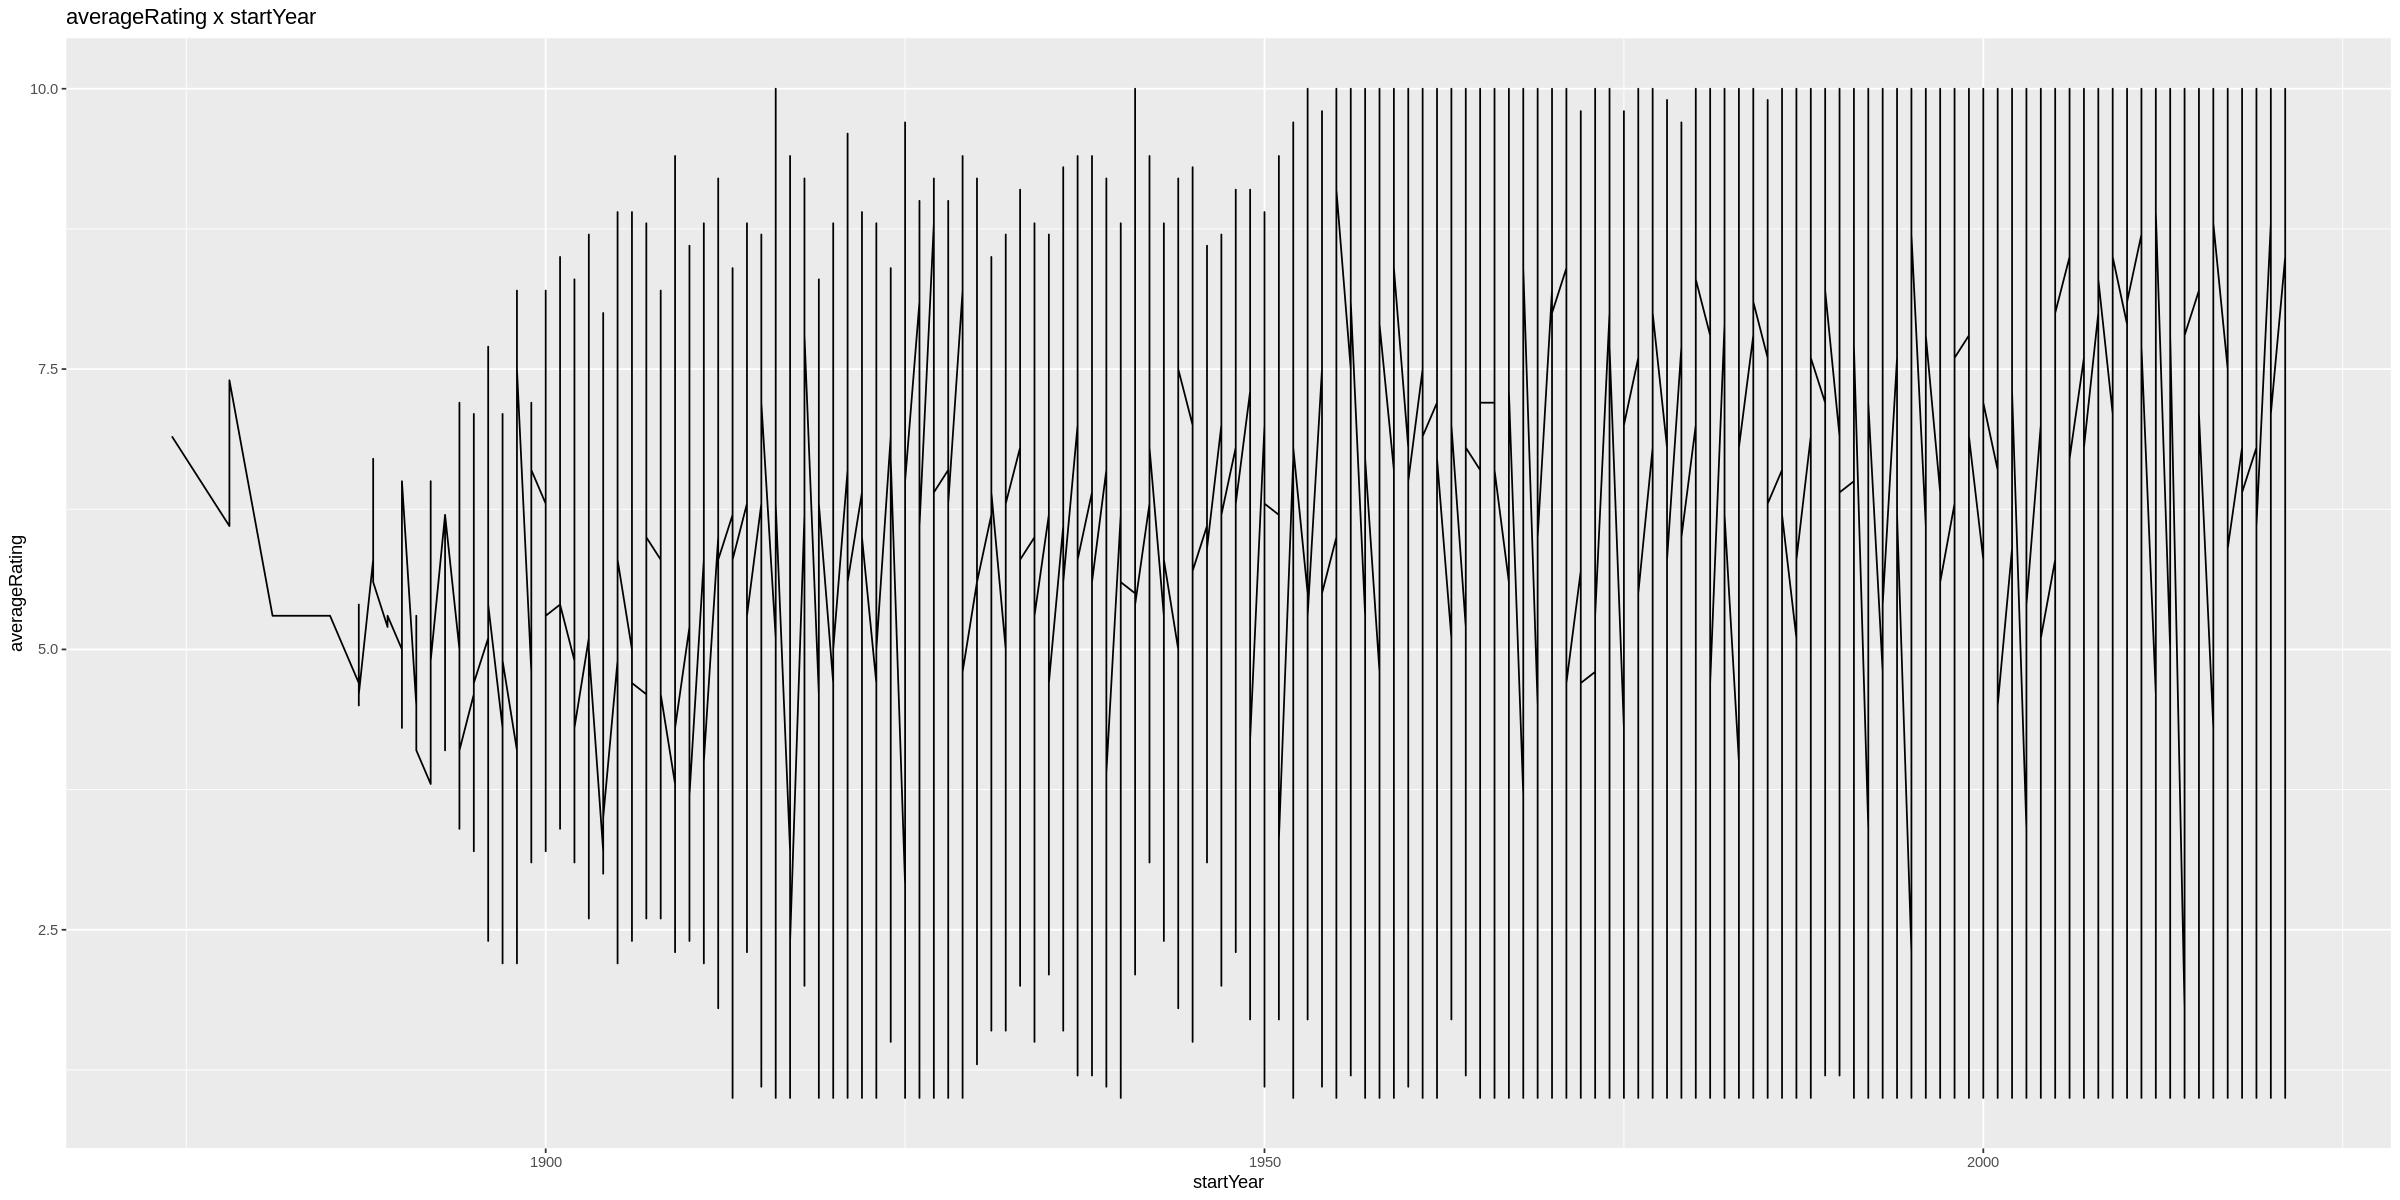

In [41]:
#Grafico 3

 p1 <- ggplot() + 
        geom_line(aes(y = averageRating, x = startYear), data = datos)
                 theme(text=element_text(family="Tahoma"))
p1 + labs(title = "averageRating x startYear", x = "startYear", y = "averageRating")

In [239]:
write.csv(entrenar, file = "entrenar.csv", row.names = F)

In [240]:
write.csv(test, file = "test.csv", row.names = F)

In [241]:
write.csv(resultados, file = "resultadoss.csv", row.names = F)

In [242]:
write.csv(datos, file = "datoss.csv", row.names = F)

In [243]:
resultados

numVotes,titleType,isAdult,startYear,runtimeMinutes,directors,writers,seasonNumber,episodeNumber,language,⋯,writerbueno,writermalo,titletypebueno,titletypmalo,generobueno,generomalo,companiesbueno,companiesmalo,countriesbueno,countriesmalo
<int>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
15,video,0,1999,3,nm2897815,\N,,8,\N,⋯,1,0,1,0,1,0,1,0,1,0
226,tvEpisode,0,2007,13,nm3005544,nm3005544,2,8,,⋯,1,0,1,0,1,0,1,0,1,0
98,tvEpisode,0,1971,60,nm0568535,"nm0588513,nm0531990,nm0582307,nm0912766",16,24,\N,⋯,0,0,1,0,1,0,1,0,1,0
22,tvSeries,0,2001,45,"nm1234625,nm0823288","nm0823288,nm1234625",,8,,⋯,0,0,1,0,1,0,1,0,1,0
48,tvEpisode,0,2014,47,nm1788073,"nm0937725,nm0382985,nm0049569",8,1,,⋯,0,0,1,0,1,0,1,0,1,0
6457,movie,0,1952,148,nm0003226,"nm0407294,nm0003226,nm0406808",,8,\N,⋯,0,0,1,0,1,0,0,0,1,0
8,tvEpisode,0,2019,45,\N,"nm1133652,nm1949545",2,24,,⋯,0,0,1,0,1,0,1,0,1,0
8,short,0,2010,12,nm2832727,nm2832727,,8,\N,⋯,0,0,1,0,1,0,1,0,1,0
9,movie,0,2011,55,"nm4442140,nm4090207",\N,,8,,⋯,1,0,1,0,1,0,1,0,1,0


In [244]:
entrenar

,averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,directors,writers,seasonNumber,episodeNumber,⋯,titletypebueno,titletypmalo,generoxbueno,generoxmalo,generoybueno,generoymalo,companiesbueno,companiesmalo,countriesbueno,countriesmalo
,<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1.8,12,tvEpisode,0,2014,21,\N,\N,4,5,⋯,1,0,1,0,1,0,1,0,1,0
2,8.8,5,tvEpisode,0,2020,46,\N,\N,8,9,⋯,1,0,1,0,1,0,1,0,1,0
3,8.5,35,video,0,2006,7,nm2040572,nm2040572,2,8,⋯,1,0,1,0,1,0,1,0,1,0
7,8.0,22,tvEpisode,0,2008,22,"nm0632383,nm2991644","nm0393289,nm2400175,nm0945348",1,25,⋯,1,0,1,0,1,0,1,0,1,0
8,7.2,6,movie,0,1962,46,\N,nm0169716,2,8,⋯,1,0,1,0,1,0,1,0,1,0
9,5.9,219,short,0,2002,15,nm1210547,nm1210547,2,8,⋯,1,0,1,0,1,0,1,0,1,0
15,4.6,7,movie,0,2012,77,nm4919289,"nm4919289,nm4919275",2,8,⋯,1,0,0,0,1,0,1,0,1,0
17,7.6,21,tvEpisode,0,1994,25,nm0573732,"nm0528480,nm0513516,nm4046499,nm4046047",1,6,⋯,1,0,1,0,1,0,1,0,1,0
18,6.9,2249,movie,0,1990,75,nm0771318,"nm0006782,nm0914821",2,8,⋯,1,0,1,0,1,0,1,0,0,0


In [245]:
datos

averageRating,numVotes,titleType,isAdult,startYear,runtimeMinutes,directors,writers,seasonNumber,episodeNumber,⋯,titletypebueno,titletypmalo,generoxbueno,generoxmalo,generoybueno,generoymalo,companiesbueno,companiesmalo,countriesbueno,countriesmalo
<dbl>,<int>,<fct>,<fct>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1.8,12,tvEpisode,0,2014,21,\N,\N,4,5,⋯,1,0,1,0,1,0,1,0,1,0
8.8,5,tvEpisode,0,2020,46,\N,\N,8,9,⋯,1,0,1,0,1,0,1,0,1,0
8.5,35,video,0,2006,7,nm2040572,nm2040572,2,8,⋯,1,0,1,0,1,0,1,0,1,0
4.3,11,short,0,2016,46,nm3579598,nm2765889,2,8,⋯,1,0,1,0,1,0,1,0,1,0
7.4,10,tvEpisode,0,2014,22,\N,nm1444457,1,9,⋯,1,0,1,0,1,0,1,0,1,0
6.6,5,tvEpisode,0,1986,50,nm0857280,"nm0302825,nm0384386,nm0821601",1,12,⋯,1,0,1,0,1,0,1,0,1,0
8.0,22,tvEpisode,0,2008,22,"nm0632383,nm2991644","nm0393289,nm2400175,nm0945348",1,25,⋯,1,0,1,0,1,0,1,0,1,0
7.2,6,movie,0,1962,46,\N,nm0169716,2,8,⋯,1,0,1,0,1,0,1,0,1,0
5.9,219,short,0,2002,15,nm1210547,nm1210547,2,8,⋯,1,0,1,0,1,0,1,0,1,0
